<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Machine_learning_model_driven_credit_risk_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install SMOTE

In [ ]:
# pip install imblearn

In [ ]:
# pip install xgboost

In [ ]:
# pip install kagglehub

In [ ]:
# pip install scikit-optimize

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "parisrohan/credit-score-classification",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# print("First 5 records:", df.head())
df

<ipython-input-6-3cfae03ebc31>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(
/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
# Import necessary libraries for data analysis, visualization, and machine learning
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Importing libraries for dealing with imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from collections import Counter

# Importing libraries for machine learning model building and evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from scipy.stats import randint, uniform


# Suppressing warnings to keep the output clean and focused on results
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1111/train.csv')
# # df = pd.read_csv('train.csv')
# df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
df_analisis = df.copy()

In [ ]:
# mengisi nilai yang hilang pada kolom tertentu
df_analisis['Monthly_Inhand_Salary'].fillna(df_analisis['Monthly_Inhand_Salary'].mean(), inplace=True)
df_analisis['Num_Credit_Inquiries'].fillna(df_analisis['Num_Credit_Inquiries'].mean(), inplace=True)
df_analisis['Type_of_Loan'].fillna('unknown', inplace=True)
df_analisis['Credit_History_Age'].fillna('0 Years and 0 Months', inplace=True)

In [ ]:
'''konversi kolom Age menjadi numerik dan memperbaiki nilai yang negatif.
fungsi lambda dan apply dibuat untuk mengubah nilai negatif menjadi nilai obsolute, sehingga usia menjadi positif.
sehingga nilai tampak menjadi konsisten.'''
df_analisis['Age'] = pd.to_numeric(df_analisis['Age'], errors='coerce') # Mengonversi kolom 'Age' menjadi numerik, mengatasi error dengan 'coerce' sehingga nilai tidak valid menjadi NaN.
df_analisis['Age'] = df_analisis['Age'].apply(lambda x: abs(x) if x < pd.notnull(x) and x < 0 else x)

In [ ]:
# mendefenisikan fungsi untuk konversi Credit_History_Age menjadi Bulan

def parse_credit_history(age_str):
  # memeriksa apakah nilai yang diterima kosong (NaN) atau bukan string
  # jika iya, maka dianggap tidak memiliki riwayat kredit, sehingga dikembalikan nilai 0
  if pd.isna(age_str) or not isinstance(age_str, str):
    return 0

  # menggunakan regular expression (regex) untuk mencari angka sebelum kata "Years" dan "Months"
  years = re.search(r'(\d+)\s*Years', age_str) # inisiasi untuk tahun
  months = re.search(r'(\d+)\s*Months', age_str) # inisiasi untuk bulan

  years = int(years.group(1)) if years else 0 # jika angka tahun ditemukan, akan dikonversi ke integer, jika tidak, setel ke 0
  months = int(months.group(1)) if months else 0 # jika angka bulan ditemukan, akan dikonversi ke integer, jika tidak, setel ke 0

  return years * 12 + months # mengembalikan total riwayat kredit dalam setahun

# Menerapkan fungsi parse_credit_history ke kolom 'Credit_History_Age'
# Hasil konversi akan disimpan dalam kolom baru 'Credit_History_Months'
df_analisis['Credit_History_Months'] = df_analisis['Credit_History_Age'].apply(parse_credit_history)

In [ ]:
# akan melakukan konversi kolom "Monthly_Balance" menjadi tipenumerik
df_analisis['Monthly_Balance'] = pd.to_numeric(df_analisis['Monthly_Balance'], errors='coerce') # jika terdapat nilai yang tidak dapat dikonversi (misalnya teks), maka akan diubah menjadi NaN
# melakukan konversi kolom "Amount_invested_montly" menjadi tipe numerik
df_analisis['Amount_invested_monthly'] = pd.to_numeric(df_analisis['Amount_invested_monthly'], errors='coerce') # jika terdapat nilai yang tidak valid, maka akan digantikan dengan NaN

In [ ]:
# menampilkan ringkasan pembersihan data
cleaning_summary = {'Missing Value (Post)': df_analisis.isnull().sum(), # menampilkan jumlah nilai yang hilang (NaN) setelah cleaning
                    'Dtypes': df_analisis.dtypes, # menampilkan tipe data dari setiap kolom setelah pembersihan
                    'Preview': df_analisis.head(6)} # menampilkan 6 baris seabagai sample data teratas untuk melihat hasil perubahan
cleaning_summary # menampilkan ringkasan pembersihan data

{'Missing Value (Post)': ID                             0
 Customer_ID                    0
 Month                          0
 Name                        9985
 Age                         4939
 SSN                            0
 Occupation                     0
 Annual_Income                  0
 Monthly_Inhand_Salary          0
 Num_Bank_Accounts              0
 Num_Credit_Card                0
 Interest_Rate                  0
 Num_of_Loan                    0
 Type_of_Loan                   0
 Delay_from_due_date            0
 Num_of_Delayed_Payment      7002
 Changed_Credit_Limit           0
 Num_Credit_Inquiries           0
 Credit_Mix                     0
 Outstanding_Debt               0
 Credit_Utilization_Ratio       0
 Credit_History_Age             0
 Payment_of_Min_Amount          0
 Total_EMI_per_month            0
 Amount_invested_monthly     8784
 Payment_Behaviour              0
 Monthly_Balance             1209
 Credit_Score                   0
 Credit_History_Months  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
credit_score = df_analisis['Credit_Score'].unique()
type(credit_score), credit_score

(numpy.ndarray, array(['Good', 'Standard', 'Poor'], dtype=object))

In [ ]:
name = df_analisis['Name'].unique()
type(name), name

(numpy.ndarray,
 array(['Aaron Maashoh', nan, 'Rick Rothackerj', ..., 'Chris Wickhamm',
        'Sarah McBridec', 'Nicks'], dtype=object))

In [ ]:
job = df_analisis['Occupation'].unique()
type(job), job

(numpy.ndarray,
 array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
        'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
        'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
        'Architect'], dtype=object))

In [ ]:
df_analisis[df_analisis['Credit_Score']=='Good']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,...,809.98,31.944960,0 Years and 0 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,4194.170850,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,0x25fd0,CUS_0xaf61,March,Chris Wickhamm,49.0,133-16-7738,Writer,37188.1,4194.170850,1,...,620.64,24.540510,29 Years and 11 Months,No,84.205949,125.956592,Low_spent_Medium_value_payments,379.538292,Good,359
99979,0x25fd1,CUS_0xaf61,April,Chris Wickhamm,49.0,133-16-7738,Writer,37188.1,3097.008333,1,...,620.64,36.979007,30 Years and 0 Months,NM,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good,360
99981,0x25fd3,CUS_0xaf61,June,Chris Wickhamm,50.0,133-16-7738,Writer,37188.1_,3097.008333,1,...,620.64,37.753013,30 Years and 2 Months,NM,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good,362
99982,0x25fd4,CUS_0xaf61,July,Chris Wickhamm,50.0,133-16-7738,Writer,37188.1,3097.008333,1,...,620.64,38.850680,30 Years and 3 Months,No,84.205949,82.825572,!@9#%8,412.669312,Good,363


In [ ]:
df_analisis[df_analisis['Credit_Score']=='Poor']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
56,0x1656,CUS_0x5407,January,Annk,7580.0,500-92-6408,Media_Manager,34081.38_,4194.170850,8,...,1704.18,24.448063,0 Years and 0 Months,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor,0
57,0x1657,CUS_0x5407,February,Annk,30.0,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,1704.18,35.171160,14 Years and 8 Months,Yes,70.478333,38.436983,High_spent_Large_value_payments,392.196185,Poor,176
58,0x1658,CUS_0x5407,March,Annk,NaN,500-92-6408,Media_Manager,34081.38,4194.170850,8,...,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.720765,Low_spent_Large_value_payments,260.912402,Poor,177
59,0x1659,CUS_0x5407,April,Annk,30.0,500-92-6408,_______,34081.38,2611.115000,8,...,1704.18,29.762159,14 Years and 10 Months,Yes,70.478333,220.552192,Low_spent_Small_value_payments,260.080975,Poor,178
63,0x165d,CUS_0x5407,August,Annk,30.0,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,1704.18,33.823488,15 Years and 2 Months,Yes,70.478333,29.326364,High_spent_Medium_value_payments,411.306804,Poor,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor,377
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,378
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,379
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,380


In [ ]:
df_analisis[df_analisis['Credit_Score']=='Standard']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
7,0x1609,CUS_0xd40,August,NaN,23.0,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,809.98,23.933795,0 Years and 0 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,NaN,004-07-5839,_______,34847.84,3037.986667,2,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,319
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84_,3037.986667,2,...,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard,321
22,0x1620,CUS_0x2dbc,July,NaN,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.555517,Standard,219
23,0x1621,CUS_0x2dbc,August,Langep,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,38.374753,18 Years and 4 Months,No,246.992319,NaN,High_spent_Small_value_payments,895.494583,Standard,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28.0,031-35-0942,_______,20002.88,1929.906667,10,...,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.366603,!@9#%8,307.659291,Standard,73
99990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28.0,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7,25.123535,0 Years and 0 Months,Yes,60.964772,173.275503,Low_spent_Large_value_payments,228.750392,Standard,0
99991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29.0,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard,75
99993,0x25fe7,CUS_0x942c,February,Nicks,25.0,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.733095,Low_spent_Medium_value_payments,400.104466,Standard,376


In [ ]:
df_analisis.set_index(['Month', 'Credit_Score', 'Payment_Behaviour'])

,,,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
Month,Credit_Score,Payment_Behaviour,,,,,,,,,,,,,,,,,,,,,
January,Good,High_spent_Small_value_payments,0x1602,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,312.494089,265
February,Good,Low_spent_Large_value_payments,0x1603,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,4,...,4.0,Good,809.98,31.944960,0 Years and 0 Months,No,49.574949,118.280222,284.629162,0
March,Good,Low_spent_Medium_value_payments,0x1604,CUS_0xd40,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,4194.170850,3,4,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,331.209863,267
April,Good,Low_spent_Small_value_payments,0x1605,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,4,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,223.451310,268
May,Good,High_spent_Medium_value_payments,0x1606,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,341.489231,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
April,Poor,High_spent_Large_value_payments,0x25fe9,CUS_0x942c,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,479.866228,378
May,Poor,High_spent_Medium_value_payments,0x25fea,CUS_0x942c,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,496.651610,379
June,Poor,High_spent_Large_value_payments,0x25feb,CUS_0x942c,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,516.809083,380


In [ ]:
payment_behavior = df_analisis['Payment_Behaviour'].unique()
type(payment_behavior), payment_behavior

(numpy.ndarray,
 array(['High_spent_Small_value_payments',
        'Low_spent_Large_value_payments',
        'Low_spent_Medium_value_payments',
        'Low_spent_Small_value_payments',
        'High_spent_Medium_value_payments', '!@9#%8',
        'High_spent_Large_value_payments'], dtype=object))

In [ ]:
df_analisis[df_analisis['Payment_Behaviour']=='High_spent_Small_value_payments']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265
17,0x161b,CUS_0x2dbc,February,NaN,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.860384,High_spent_Small_value_payments,998.869297,Good,214
18,0x161c,CUS_0x2dbc,March,Langep,34.0,486-85-3974,_______,143162.64,4194.170850,1,...,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good,215
22,0x1620,CUS_0x2dbc,July,NaN,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.555517,Standard,219
23,0x1621,CUS_0x2dbc,August,Langep,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,38.374753,18 Years and 4 Months,No,246.992319,NaN,High_spent_Small_value_payments,895.494583,Standard,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99952,0x25faa,CUS_0x2084,January,Ryanl,20.0,253-72-7758,Architect,38321.39,3354.449167,4,...,678.57,35.123923,16 Years and 11 Months,No,114.271146,131.988993,High_spent_Small_value_payments,349.184777,Poor,203
99960,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18.0,340-85-7301,Lawyer,42903.79,3468.315833,0,...,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.514945,High_spent_Small_value_payments,493.341182,Good,337
99962,0x25fb8,CUS_0x372c,March,NaN,18.0,340-85-7301,Lawyer,42903.79,3468.315833,0,...,1079.48,31.738359,28 Years and 3 Months,No,34.975457,114.850425,High_spent_Small_value_payments,457.005702,Good,339
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44.0,#F%$D@*&8,Media_Manager,16680.35,1528.029167,1,...,897.16,39.868572,0 Years and 0 Months,NM,41.113561,52.951978,High_spent_Small_value_payments,318.737378,Good,0


In [ ]:
df_analisis[df_analisis['Payment_Behaviour']=='Low_spent_Large_value_payments']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,...,809.98,31.944960,0 Years and 0 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0
20,0x161e,CUS_0x2dbc,May,Langep,34.0,486-85-3974,_______,143162.64,12187.220000,1,...,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good,217
24,0x1626,CUS_0xb891,January,Jasond,54.0,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard,207
28,0x162a,CUS_0xb891,May,Jasond,55.0,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,41.154317,17 Years and 7 Months,No,16.415452,NaN,Low_spent_Large_value_payments,359.374916,Standard,211
30,0x162c,CUS_0xb891,July,Jasond,55.0,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,26.056395,17 Years and 9 Months,No,16.415452,71.283675,Low_spent_Large_value_payments,443.549957,Standard,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,0x25fbb,CUS_0x372c,June,NaN,19.0,340-85-7301,Lawyer,42903.79,3468.315833,0,...,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.355969,Low_spent_Large_value_payments,394.500158,Good,342
99972,0x25fc6,CUS_0xf16,May,Maria Sheahanb,1753.0,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,897.16,37.788217,21 Years and 5 Months,No,41.113561,64.549748,Low_spent_Large_value_payments,317.139608,Standard,257
99975,0x25fc9,CUS_0xf16,August,Maria Sheahanb,45.0,868-70-2218,Media_Manager,16680.35,4194.170850,1,...,897.16,41.212367,0 Years and 0 Months,No,41.113561,70.805550,Low_spent_Large_value_payments,310.883806,Good,0
99990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28.0,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7,25.123535,0 Years and 0 Months,Yes,60.964772,173.275503,Low_spent_Large_value_payments,228.750392,Standard,0


In [ ]:
df_analisis[df_analisis['Payment_Behaviour']=='Low_spent_Medium_value_payments']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,4194.170850,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,4194.170850,2,...,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good,322
19,0x161d,CUS_0x2dbc,April,Langep,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,39.501648,0 Years and 0 Months,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good,0
34,0x1634,CUS_0x1cdb,March,Deepaa,21.0,615-06-7821,Developer,35547.71,2853.309167,7,...,943.86,23.462303,30 Years and 10 Months,Yes,0.000000,173.138651,Low_spent_Medium_value_payments,392.192266,Standard,370
41,0x163f,CUS_0x95ee,February,Np,31.0,612-70-8987,_______,73928.46,5988.705000,4,...,548.2,42.769864,32 Years and 0 Months,NM,0.000000,172.939214,Low_spent_Medium_value_payments,705.931286,Good,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99959,0x25fb1,CUS_0x2084,August,Ryanl,21.0,253-72-7758,Architect,38321.39_,3106.647859,4,...,678.57,28.951691,17 Years and 6 Months,No,362.072453,259.135635,Low_spent_Medium_value_payments,242.038135,Standard,210
99966,0x25fbc,CUS_0x372c,July,Lucia Mutikanik,19.0,340-85-7301,Lawyer,42903.79,3468.315833,0,...,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.873798,Low_spent_Medium_value_payments,350.982329,Good,343
99970,0x25fc4,CUS_0xf16,March,Maria Sheahanb,45.0,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,897.16,30.472041,21 Years and 3 Months,No,75011.000000,75.504972,Low_spent_Medium_value_payments,316.184384,Good,255
99978,0x25fd0,CUS_0xaf61,March,Chris Wickhamm,49.0,133-16-7738,Writer,37188.1,4194.170850,1,...,620.64,24.540510,29 Years and 11 Months,No,84.205949,125.956592,Low_spent_Medium_value_payments,379.538292,Good,359


In [ ]:
df_analisis[df_analisis['Payment_Behaviour']=='High_spent_Medium_value_payments']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
7,0x1609,CUS_0xd40,August,NaN,23.0,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,809.98,23.933795,0 Years and 0 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
14,0x1614,CUS_0x21b1,July,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,4194.170850,2,...,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good,325
21,0x161f,CUS_0x2dbc,June,Langep,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.808099,High_spent_Medium_value_payments,963.921581,Good,218
26,0x1628,CUS_0xb891,March,Jasond,55.0,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,32.301163,17 Years and 5 Months,NM,16.415452,83.406509,High_spent_Medium_value_payments,411.427123,Standard,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,0x25fb7,CUS_0x372c,February,Lucia Mutikanik,18.0,340-85-7301,Lawyer,42903.79,3468.315833,0,...,1079.48,33.494867,28 Years and 2 Months,No,34.975457,NaN,High_spent_Medium_value_payments,484.416627,Good,338
99967,0x25fbd,CUS_0x372c,August,Lucia Mutikanik,19.0,340-85-7301,Lawyer,42903.79,3468.315833,0,...,1079.48,35.716618,28 Years and 8 Months,No,34.975457,115.184984,High_spent_Medium_value_payments,446.671142,Good,344
99983,0x25fd5,CUS_0xaf61,August,Chris Wickhamm,50.0,133-16-7738,Writer,37188.1,3097.008333,1,...,620.64,39.300980,30 Years and 4 Months,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good,364
99994,0x25fe8,CUS_0x942c,March,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor,377


In [ ]:
df_analisis[df_analisis['Payment_Behaviour']=='!@9#%8']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good,270
16,0x161a,CUS_0x2dbc,January,Langep,34.0,486-85-3974,_______,143162.64,12187.220000,1,...,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,!@9#%8,1043.315978,Good,213
32,0x1632,CUS_0x1cdb,January,Deepaa,21.0,615-06-7821,Developer,35547.71_,2853.309167,7,...,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.725394,!@9#%8,288.605522,Standard,368
47,0x1645,CUS_0x95ee,August,Np,31.0,612-70-8987,Lawyer,73928.46,5988.705000,4,...,548.2,31.580990,32 Years and 6 Months,No,0.000000,42.635590,!@9#%8,796.234910,Good,390
54,0x1650,CUS_0x284a,July,Nadiaq,NaN,#F%$D@*&8,Lawyer,10909427.0,4194.170850,0,...,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.391898,!@9#%8,326.241830,Good,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,0x25fa1,CUS_0x51b3,April,NaN,33.0,837-85-9800,Media_Manager,59146.36,4908.863333,2,...,418.03,28.091458,20 Years and 4 Months,No,26.778419,183.584149,!@9#%8,530.523765,Standard,244
99980,0x25fd2,CUS_0xaf61,May,Chris Wickhamm,49.0,133-16-7738,Writer,37188.1,3097.008333,1,...,620.64,27.495263,30 Years and 1 Months,No,84.205949,78.497727,!@9#%8,396.997157,Standard,361
99982,0x25fd4,CUS_0xaf61,July,Chris Wickhamm,50.0,133-16-7738,Writer,37188.1,3097.008333,1,...,620.64,38.850680,30 Years and 3 Months,No,84.205949,82.825572,!@9#%8,412.669312,Good,363
99989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28.0,031-35-0942,_______,20002.88,1929.906667,10,...,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.366603,!@9#%8,307.659291,Standard,73


In [ ]:
df_analisis[df_analisis['Payment_Behaviour']=='High_spent_Large_value_payments']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84_,3037.986667,2,...,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard,321
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good,324
40,0x163e,CUS_0x95ee,January,Np,31.0,612-70-8987,Lawyer,73928.46,4194.170850,4,...,548.2,39.962685,0 Years and 0 Months,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good,0
50,0x164c,CUS_0x284a,March,Nadiaq,34.0,411-51-0676,Lawyer,131313.4,10469.207759,0,...,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.064321,High_spent_Large_value_payments,1038.569407,Good,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,0x25fda,CUS_0x8600,January,Sarah McBridec,28.0,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.370670,High_spent_Large_value_payments,328.655224,Poor,68
99987,0x25fdd,CUS_0x8600,April,Sarah McBridec,NaN,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7,30.614953,5 Years and 11 Months,Yes,60.964772,43.724617,High_spent_Large_value_payments,328.301277,Standard,71
99991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29.0,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard,75
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,378


# Feature Engineering

In [ ]:
# mendefenisikan dictionary untuk memetakan kategori perilaku pembayaran menjadi skor numerik
payment_behaviour_mapping = {'High_spent_Small_value_payments': 1, # skor 1 untuk pengeluaran tinggi dengan pembayaran kecil
                            'Low_spent_Large_value_payments': 3, # skor 3 untuk pengeluaran rendah dengan pembayaran besar
                            'Low_spent_Medium_value_payments': 2, # Skor 2 untuk pengeluaran rendah dengan pembayaran sedang
                            'Low_spent_Small_value_payments': 1, # Skor 1 untuk pengeluaran rendah dengan pembayaran kecil
                            'High_spent_Medium_value_payments': 2, # Skor 2 untuk pengeluaran tinggi dengan pembayaran sedang
                            'High_spent_Large_value_payments': 3} # Skor 3 untuk pengeluaran tinggi dengan pembayaran besar

# mengonversi nilai dalam kolom "Payment_Behaviour" menjadi skor numerik berdasarkan mapping
df_analisis['Payment_Behaviour_Score'] = df_analisis['Payment_Behaviour'].map(payment_behaviour_mapping)

# Melakukan transformasi nilai 'Payment_of_Min_Amount' ke bentuk binary (Yes → 1, No → 0)
payment_min_mapping = {'Yes': 1,
                       'No': 0}
df_analisis['Payment_Min_Indicator'] = df_analisis['Payment_of_Min_Amount'].map(payment_min_mapping)


# mengonversikan kolom "Outstanding_Debt" dan "Annual_Income" menjadi tipe numerik
# Jika ada nilai yang tidak valid, akan dikonversi menjadi NaN (error='coerce')
df_analisis['Outstanding_Debt'] = pd.to_numeric(df_analisis['Outstanding_Debt'], errors='coerce')
df_analisis['Annual_Income'] = pd.to_numeric(df_analisis['Annual_Income'], errors='coerce')

# Menghitung rasio hutang terhadap pendapatan (Debt-to-Income Ratio)
df_analisis['Debt_to_Income_Ratio'] = df_analisis['Outstanding_Debt'] / df_analisis['Annual_Income']


# Mendefinisikan rentang usia untuk mengelompokkan individu ke dalam kelompok usia yang berbeda
bins_umur = [0,20,30,40,50,60,100]
label_umur = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

# Membuat kolom baru 'Grup_Umur' berdasarkan kategori usia
df_analisis['Grup_Umur'] = pd.cut(df_analisis['Age'],
                                  bins=bins_umur,
                                  labels=label_umur,
                                  right=False)

# Mengonversi nilai kategori dalam kolom 'Occupation' menjadi kode numerik
df_analisis['Occupation_Encode'] = df_analisis['Occupation'].astype('category').cat.codes

# Membuat ringkasan data yang menampilkan 6 baris pertama dari beberapa kolom terpilih
ringkasan = df_analisis[['Payment_Behaviour_Score',
                         'Payment_Min_Indicator',
                         'Debt_to_Income_Ratio',
                         'Grup_Umur',
                         'Occupation_Encode']].head(6)
ringkasan  # Menampilkan ringkasan data

,Payment_Behaviour_Score,Payment_Min_Indicator,Debt_to_Income_Ratio,Grup_Umur,Occupation_Encode
0,1.0,0.0,0.042376,20-30,12
1,3.0,0.0,0.042376,20-30,12
2,2.0,0.0,0.042376,NaN,12
3,1.0,0.0,0.042376,20-30,12
4,2.0,0.0,0.042376,20-30,12
5,NaN,0.0,0.042376,20-30,12


# Insight:

* Mapping payment behavior to scores: saya menetapkan nilai numerik ke berbagai kategori perilaku pembayaran menggunakan **payment_bevaviour_mapping** dengan skor yang lebih tinggi menunjukkan pengeluaran yang lebih tinggi atau pembayaran yang lebih besar.
* Transformasi the **payment_of_min_amount** ke nilai binary.
* mengubah Outstandinfg_Debt dan Annual_Income menjadi numerik. saya mempersiapkan kolom untuk menghitung rasio utang terhadap **Debt_to_Income_Ratio** saat melakukan perhitungan dan analisis keuangan.
* mengelompokkan **Age** kedalam kelompok Umur: saya mengategorikan **Age** kolom ke dalam bentuk kelompok usia untuk memudahkan dalam analisis tren berdasarkan rentang usia.
* pengkodean **Occupation**: saya melakukan encode sebagai kode kategori untuk menangani secara numerik dalam tugas pengkodean.

# Exploratory Data Analysis (EDA) dan Visualization

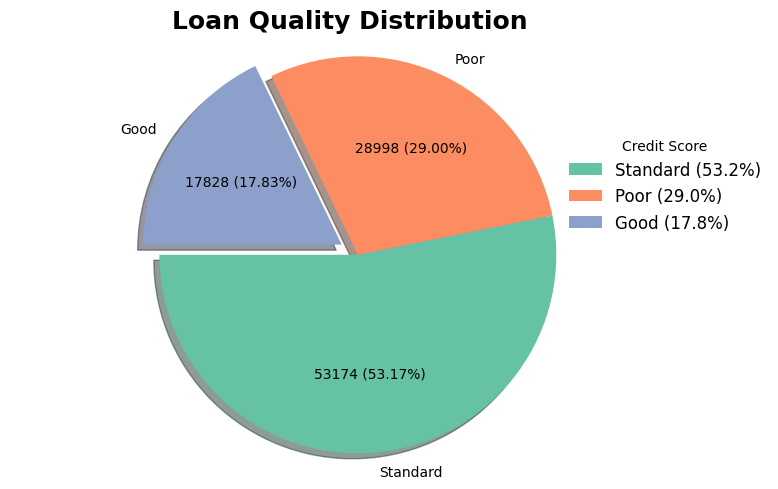

In [ ]:
# membuat figure dengan ukuran 8x5 inci
fig = plt.figure(figsize=(8,5))
cs = df_analisis['Credit_Score'].value_counts() # menghitung jumlah masing-masing kategori dalam Credit_Score
percent = cs * 100/len(df_analisis)  # menghitung persentase dari masing-masing kategori
labels = ['Standard', 'Poor', 'Good']  # menentukan label kategori kredit skor
labels_with_percent = [f'{label} ({pct:.1f}%)' for label, pct in zip(labels, percent)] # Membuat daftar label dengan tambahan persentase untuk ditampilkan di legenda
# Menentukan offset (explode) untuk menyorot segmen tertentu dalam pie chart
explode = [0, 0, 0.096] # segmen 'Good' akan sedikit terangkat
palette_color = sns.color_palette('Set2') # Menggunakan palet warna dari seaborn untuk pewarnaan chart

# Fungsi untuk menampilkan jumlah dan persentase di dalam chart
def autopct_with_count(pct, allvalues):
  absolute = int(pct / 100.*sum(allvalues))  # Konversi persen ke jumlah absolut
  return f'{absolute} ({pct:.2f}%)'


# Membuat pie chart dengan berbagai parameter
plt.pie(percent,
        labels=labels, # Memberi label pada setiap segmen
        explode=explode, # Menyorot segmen 'Good'
        autopct=lambda pct: autopct_with_count(pct, cs),   # Menampilkan jumlah dan persentase
        startangle=180, # Mengatur sudut awal
        colors=palette_color, # Menggunakan palet warna seaborn
        shadow=True)  # Memberikan efek bayangan agar lebih menarik

# Menambahkan judul pada plot dengan ukuran font yang lebih besar dan tebal
plt.title('Loan Quality Distribution',
          fontsize=18,
          fontweight='bold')

# Menambahkan legenda dengan pengaturan posisi dan tampilan
plt.legend(loc='best',  # Menempatkan legenda di lokasi terbaik
           labels=labels_with_percent, # Menggunakan label yang telah ditambahkan persentase
           title='Credit Score',  # Menambahkan judul pada legenda
           bbox_to_anchor=(0.8, 0.8),  # Mengatur posisi legenda
           fontsize=12,  # Mengatur ukuran font legenda
           frameon=False)  # Menghilangkan border pada legenda

plt.axis('equal')  # Menjaga agar pie chart tetap berbentuk lingkaran (bukan oval)
plt.tight_layout()  # Mengatur tata letak agar lebih rapi
plt.show()  # Menampilkan plot

# Analisis dan Insights

1. Kategori Kredit Standar: mengindikasikan terbanyak dengan persentase 53,17% dari total distribusi atau sebanyak 53.174. dengan ini menunjukkan bahwa mayoritas kredit memiliki kualitas sedang.
2. Kategori Kredit Buruk (Poor): mengindikasikan kategori kedua dengan hasil presentase 29% dari total distribusi atau sebanyak 28.997. hasil ini memberikan cukup signifikan, yang berarti sekitas sepertiga dari kredit berada pada resiko tinggi. hal ini dapat menjadi perhatian untuk mitigasi risiko.
3. Kategori Kredit Baik (Good): mengindikasikan paling sedikit dengan presentase 17.83% dari total distribusi atau sebanyak 17.827. Jumlah ini menunjukkan adanya potensi untuk meningkatkan jumlah kredit berkualitas baik dengan cara meningkatkan kriteria penilaian atau memberikan edukasi kepada peminjam.

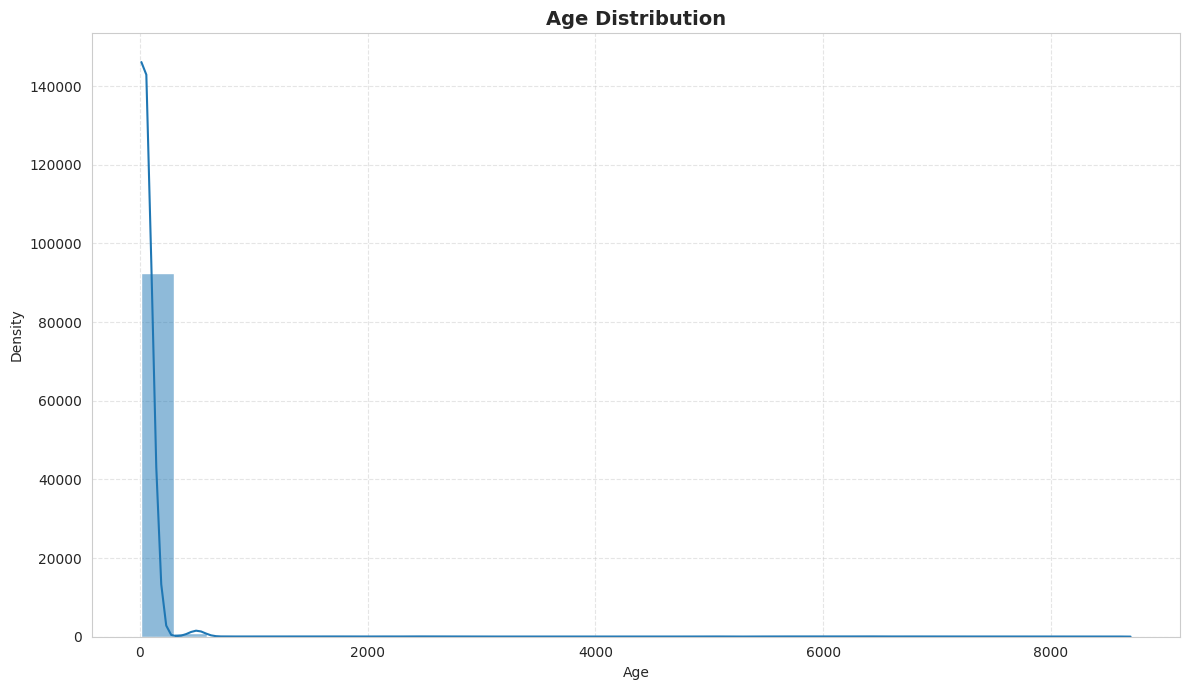

In [ ]:
sns.set_style('whitegrid') # mengatur style visualisasi dengan seaborn menjadi "whitegrid" untuk tampilan menjadi lebih menarik
plt.figure(figsize=(12,7)) # Membuat figure dengan ukuran 12x7 inci

# Membuat histogram dengan KDE (Kernel Density Estimation) untuk distribusi usia
sns.histplot(df_analisis['Age'].dropna(), # menghapus nilai NaN agar tidak mengganggu visualisasi
             kde=True, # menambahkan kurva KDE untuk menunjukkan distribusi yang lebih halus
             bins=30) # membagi rentang usia ke dalam 30 kelompok (bins)

# menambahkan judul dengan ukuran font 14 dan teks yang ditebalkan
plt.title('Age Distribution',
          fontsize=14,
          fontweight='bold')

# menambahkan label sumbu X dan Y
plt.xlabel('Age')  # memberikan label X sebagai "Age"
plt.ylabel('Density')  # memberikan label Y sebagai "Density"
# Menambahkan grid dengan garis putus-putus untuk meningkatkan keterbacaan
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()   # Mengatur tata letak agar elemen grafik tidak tumpang tindih
plt.show() # Menampilkan plot

# Analisis dan Insight

* sebagian besar populasi berada di usia produktif, yang relevan dengan tingginya variasi DTI di kelompok usia tersebut (30-50 tahun)
* ada outlier pada rentang usia yang jauh lebih tinggi (>8000). hal ini kemungkinan akibat kesalahan data atau metode pengumpulan data yang tidak akurat atau lain sebagainya.
* kesimpulan:
    1. melakukan pembersihan data untuk memastikan akurasi, terutama outlier usia yang tidak wajar.
    2. fokus dalam pengembangan produk finansial pada kelompok usia produktif karena merupakan mayoritas populasi.

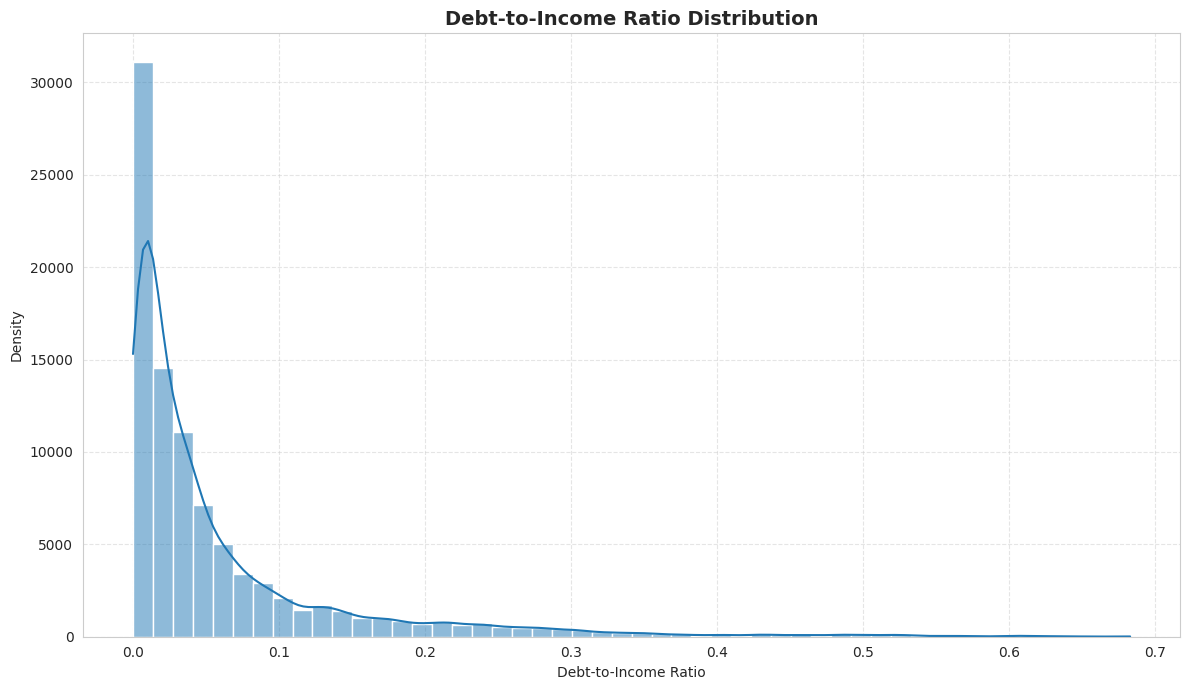

In [ ]:
# Mengatur gaya visualisasi seaborn menjadi 'whitegrid' untuk tampilan lebih bersih
sns.set_style('whitegrid')
plt.figure(figsize=(12,7)) # Membuat figure dengan ukuran 12x7 inci

# Membuat histogram dengan KDE (Kernel Density Estimation) untuk distribusi usia
sns.histplot(df_analisis['Debt_to_Income_Ratio'].dropna(), # Menghapus nilai NaN agar tidak mengganggu visualisasi
             kde=True, # Menambahkan kurva KDE untuk menunjukkan distribusi yang lebih halus
             bins=50) # Membagi rentang usia ke dalam 30 kelompok (bin)

# Menambahkan judul dengan ukuran font 14 dan teks yang ditebalkan
plt.title('Debt-to-Income Ratio Distribution',
          fontsize=14,
          fontweight='bold')

# Menambahkan label sumbu X dan Y
plt.xlabel('Debt-to-Income Ratio') # Label sumbu X sebagai "Debt-to-Income Ratio"
plt.ylabel('Density')  # Label sumbu Y sebagai "Density"
plt.grid(True, linestyle='--', alpha=0.5) # Menambahkan grid dengan garis putus-putus untuk meningkatkan keterbacaan
plt.tight_layout() # Mengatur tata letak agar elemen grafik tidak tumpang tindih
plt.show() # Menampilkan plot

# Analisis dan Insights

* sebagian besar nilai DTI berada pada kisaran rendah (<0.1), yang menunjukkan bahwa mayoritas populasi memiliki utang yang proporsional terhadap pendapatan mereka.
* Distribusi memiliki ekor panjang (right-skewed), mengindikasikan ada individu dengan DTI yang sangat tinggi, meskipun jumlahnya kecil.
* kesimpulan:
    1. Fokuskan intervensi pada individu dengan DTI tinggi untuk mencegah potensi gagal bayar.
    2. Analisis tambahan diperlukan untuk memahami faktor-faktor yang menyebabkan DTI tinggi di kelompok minoritas ini.

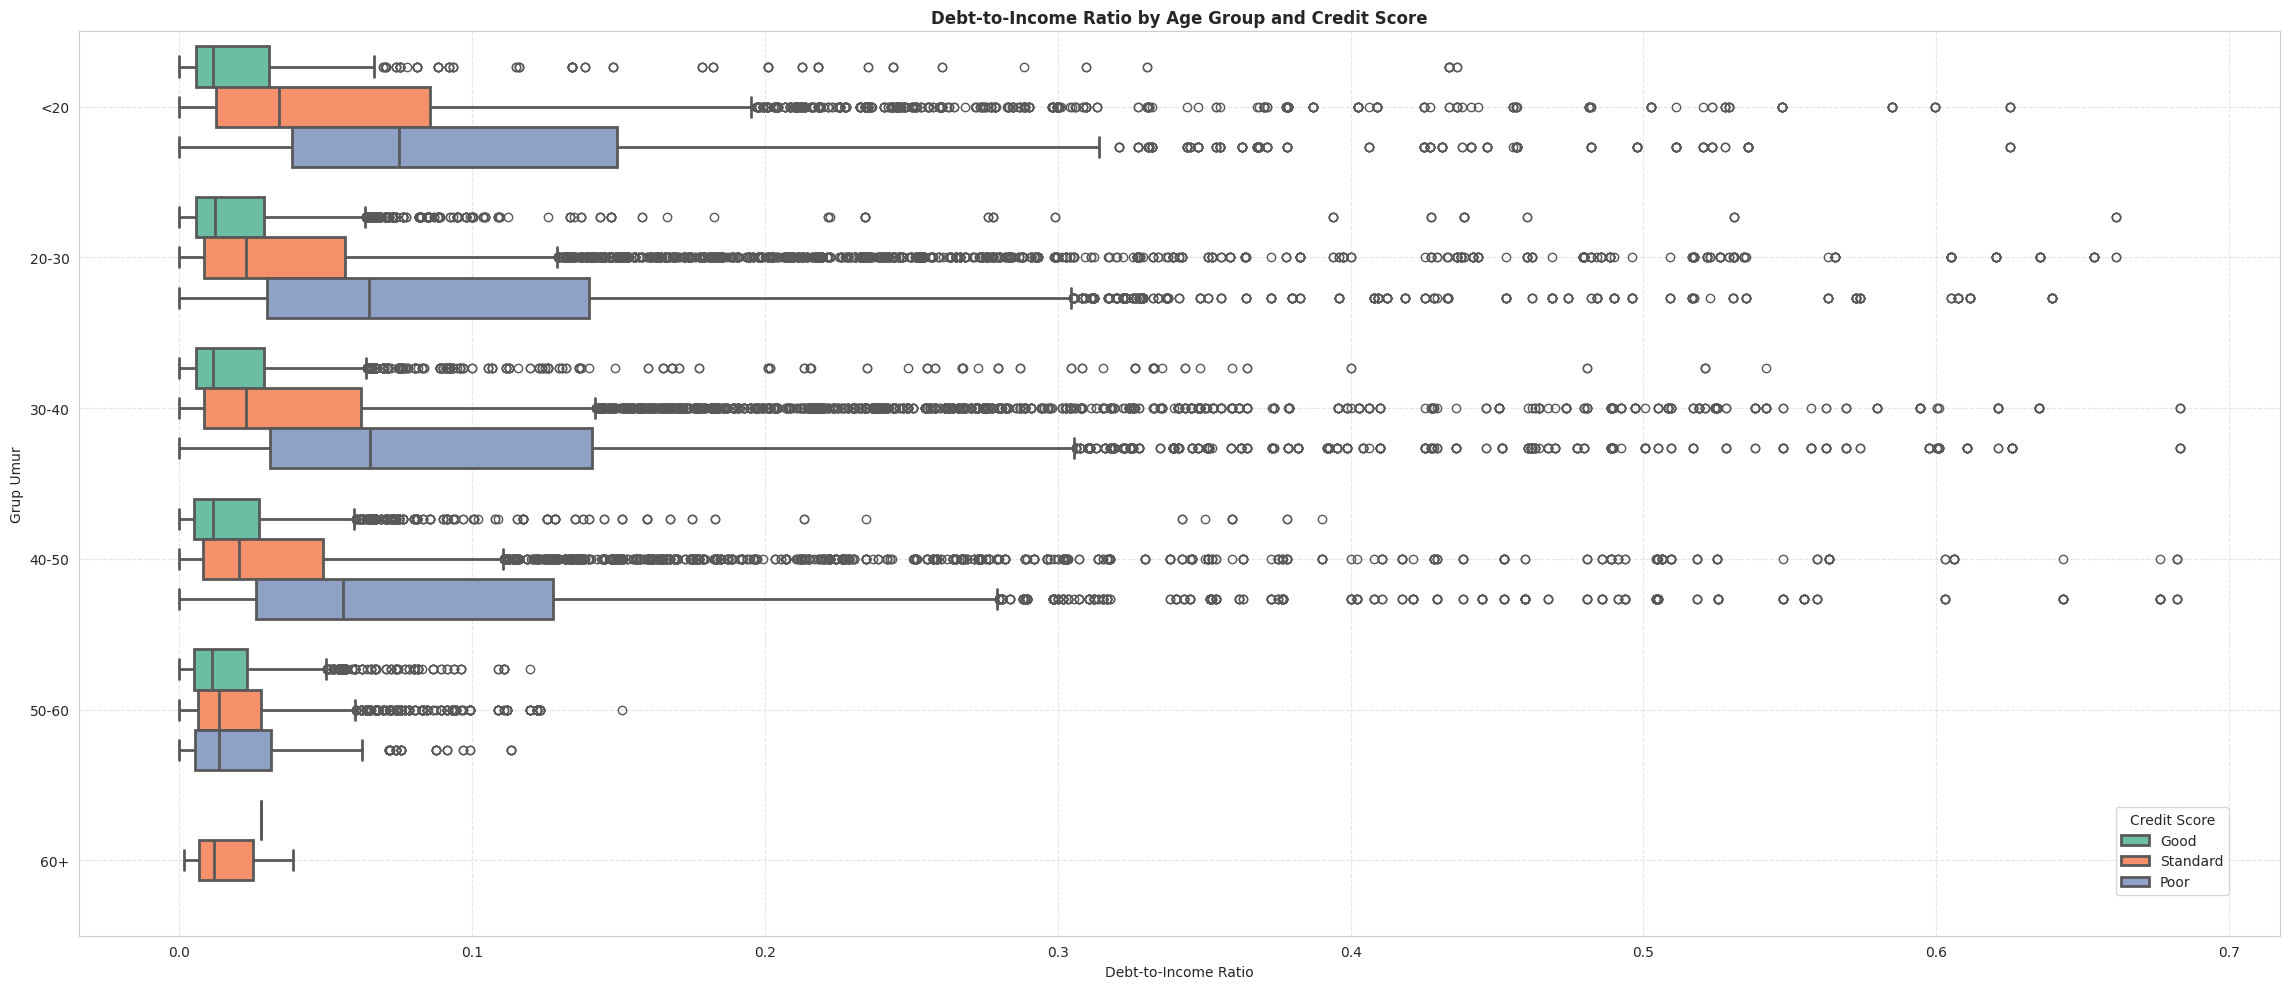

In [ ]:
# menentukan ukuran figure 23x10 inchi agar plot lebih luas dan mudah dibaca
plt.figure(figsize=(23,10))
# membuat boxplot untuk menvisualisasikan debt-ti-income ratio berdasarkan group umur dan credit score
sns.boxplot(data=df_analisis,  # menggunakan datasets df_analisis
            x='Debt_to_Income_Ratio',   # sumbu X: debt-to-Income ratio
            y='Grup_Umur',   # sumbu Y: group umur
            hue='Credit_Score', # warna berdasarkan kategori kredit skor
            palette='Set2', # menggunakan palette warna "Set2" untuk menampilkan yang lebih menarik
            saturation=0.9, # menyesuaikan saturasi warna agar lebih jelas
            linewidth=2) # mengatur ketebalan garis boxplot untuk keterbacaan yang lebih baik

# menampilkan judul plot dengan ukuran font 12 dan teks tebal
plt.title('Debt-to-Income Ratio by Age Group and Credit Score',
          fontsize=12,
          fontweight='bold')

# menambahkan label untuk sumbu Y dan sumbu X
plt.ylabel('Grup Umur')  # sumbu Y adalah grup umur
plt.xlabel('Debt-to-Income Ratio') # sumbu X adalah debt-to-income ratio

# menyesuaikan legenda
plt.legend(title='Credit Score', # menambahkan judul "Credit Score" pada legenda
           loc='best',  # menempatkan legenda di lokasi terbaik secara otomatis
           frameon=True, # menambahkan border pada legenda agar lebih jelas
           bbox_to_anchor = (0.98, 0.15)) # menyesuaikan posisi legenda agar tidak mengganggu plot
plt.grid(True, linestyle='--', alpha=0.5) # Menambahkan grid dengan garis putus-putus agar nilai lebih mudah dibaca
plt.tight_layout() # Mengatur tata letak agar elemen grafik tidak tumpang tindih
plt.show() # Menampilkan plot

# Analisis dan Insights

* DTI rendah pada usia <20 dan 60+ memiliki kelompok umur yang cenderung lebih rendah, mungkin karena pengeluaran lebih kecil atau pendapatan relatif lebih tinggi dibandingkan utang.
* DTI tinggi pada kelompok usia produktif (30-50): menunjukkan variasi yang lebih besar, terutama kategori skor kredit (Poor). hal ini menunjukkan tingginya beban utang untuk kelompok usia produktif yang lebih sering memiliki tanggungan finansial.
* Korelasi antara skor kredit dan DTI secara umum, semakin buruk skor kredit, semakin tinggi risiko DTI.
* keputusan adalah:
    1. memberikan prioritas edukasi keuangan pada kelompok usia produktif, khusunya mereka dengan skor kredit rendah.
    2. Analisis lebih dalam pada kelompok <20 dan 60+ untuk memahami mengapa DTI mereka rendah.

# Kesimpulan Umum:

* Prioritas Edukasi Finansial: Edukasi keuangan sebaiknya menyasar kelompok usia produktif (30-50 tahun), terutama mereka dengan skor kredit rendah.
* Mitigasi Risiko Kredit: Intervensi diperlukan untuk individu dengan DTI tinggi untuk mengurangi risiko kredit macet.
* Pembersihan Data: Perhatikan outlier pada distribusi umur untuk memastikan analisis dan keputusan yang lebih akurat.

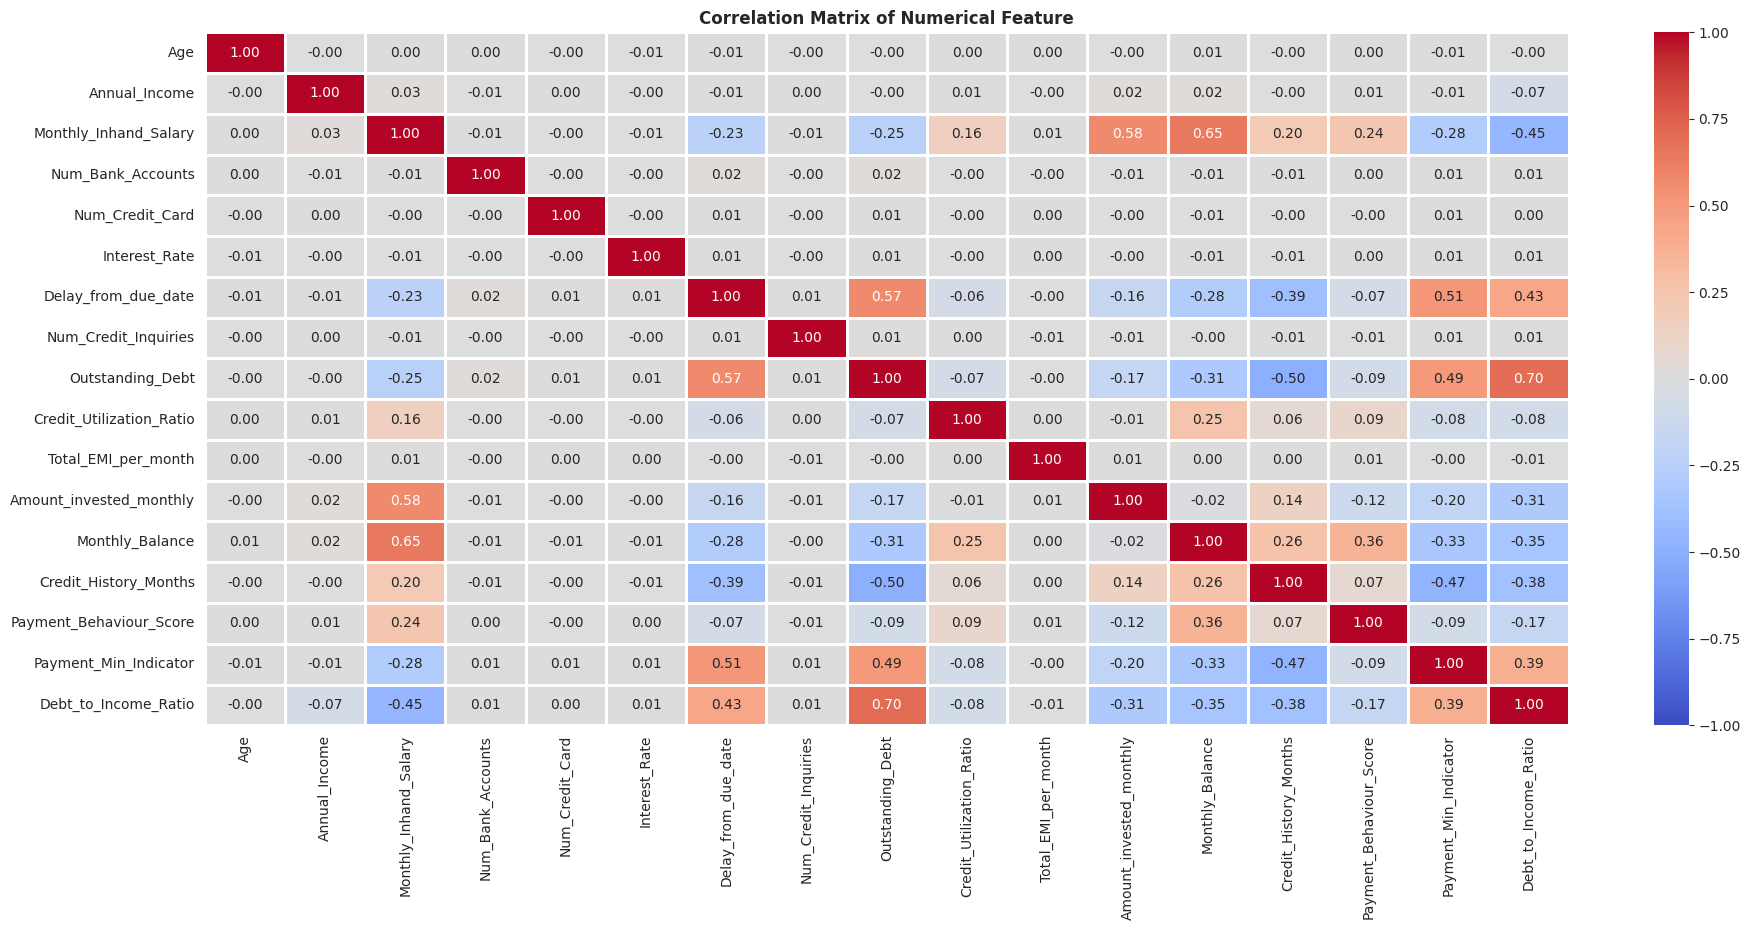

In [ ]:
# Memilih hanya kolom numerik (tipe data float64 dan int64) dari dataset
num_feature = df_analisis.select_dtypes(include=['float64', 'int64'])
# Menghitung matriks korelasi antara fitur numerik
corr = num_feature.corr()
# Menentukan ukuran figure agar heatmap lebih jelas
plt.figure(figsize=(22,9))

# Membuat heatmap untuk menampilkan korelasi antar fitur numerik
sns.heatmap(corr,  # Menggunakan data korelasi
            annot=True,  # Menampilkan nilai korelasi dalam kotak heatmap
            fmt='.2f',   # Format angka hingga 2 desimal
            cmap='coolwarm',   # Skema warna 'coolwarm' untuk menunjukkan korelasi negatif & positif
            vmin=-1, vmax=1, lw=2) # Menetapkan rentang nilai korelasi (-1 hingga 1) & # Menambahkan ketebalan garis antar sel dalam heatmap

# Menambahkan judul heatmap dengan ukuran font 12 dan teks tebal
plt.title('Correlation Matrix of Numerical Feature',
          fontsize=12,
          fontweight='bold')

# Menampilkan heatmap
plt.show()

In [ ]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  object  
 3   Name                      90015 non-null   object  
 4   Age                       95061 non-null   float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  object  
 7   Annual_Income             93020 non-null   float64 
 8   Monthly_Inhand_Salary     100000 non-null  float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              1000

In [ ]:
ass = ['Payment_Behaviour_Score','Payment_Min_Indicator', # Skor perilaku pembayaran dan indikator pembayaran minimum
       'Debt_to_Income_Ratio','Credit_Utilization_Ratio', # Rasio utang terhadap pendapatan dan rasio pemanfaatan kredit
       'Monthly_Balance','Total_EMI_per_month', # Saldo bulanan dan total cicilan bulanan (EMI)
       'Occupation_Encode','Credit_History_Months', # Kode pekerjaan dan riwayat kredit dalam bulan
       'Num_Credit_Card','Num_Bank_Accounts', # Jumlah kartu kredit dan jumlah rekening bank
       'Age','Outstanding_Debt',  # Usia dan total utang yang belum dibayar
       'Delay_from_due_date','Interest_Rate',  # Keterlambatan pembayaran dan tingkat bunga
       'Amount_invested_monthly']  # Jumlah yang diinvestasikan per bulan
adf = df_analisis[ass]  # Memilih subset data berdasarkan kolom yang telah ditentukan
adf # Menampilkan DataFrame hasil seleksi

,Payment_Behaviour_Score,Payment_Min_Indicator,Debt_to_Income_Ratio,Credit_Utilization_Ratio,Monthly_Balance,Total_EMI_per_month,Occupation_Encode,Credit_History_Months,Num_Credit_Card,Num_Bank_Accounts,Age,Outstanding_Debt,Delay_from_due_date,Interest_Rate,Amount_invested_monthly
0,1.0,0.0,0.042376,26.822620,312.494089,49.574949,12,265,4,3,23.0,809.98,3,3,80.415295
1,3.0,0.0,0.042376,31.944960,284.629162,49.574949,12,0,4,3,23.0,809.98,-1,3,118.280222
2,2.0,0.0,0.042376,28.609352,331.209863,49.574949,12,267,4,3,500.0,809.98,3,3,81.699521
3,1.0,0.0,0.042376,31.377862,223.451310,49.574949,12,268,4,3,23.0,809.98,5,3,199.458074
4,2.0,0.0,0.042376,24.797347,341.489231,49.574949,12,269,4,3,23.0,809.98,6,3,41.420153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0,0.0,0.012677,34.663572,479.866228,35.104023,9,378,6,4,25.0,502.38,23,7,60.971333
99996,2.0,0.0,0.012677,40.565631,496.651610,35.104023,9,379,6,4,25.0,502.38,18,7,54.185950
99997,3.0,0.0,0.012677,41.255522,516.809083,35.104023,9,380,6,4,25.0,502.38,27,5729,24.028477
99998,3.0,0.0,0.012677,33.638208,319.164979,35.104023,9,381,6,4,25.0,502.38,20,7,251.672582


# Build Model

In [ ]:
label_encoder = LabelEncoder() # megimpor LabelEncoder untuk mengubah kategori menjadi nilai numerik
# mengubah nilai ketegori "Credit_Score" menjadi nilai numerik
df_analisis['Credit_Score_Encoded'] = label_encoder.fit_transform(df_analisis['Credit_Score'])

# menentukan fitur yang akan digunakan untuk analisis fitur dari build model
fitur = [
    'Payment_Behaviour_Score','Payment_Min_Indicator', # Skor perilaku pembayaran & indikator pembayaran minimum
    'Debt_to_Income_Ratio','Credit_Utilization_Ratio', # Rasio utang terhadap pendapatan & rasio pemanfaatan kredit
    'Monthly_Balance','Total_EMI_per_month',  # Saldo bulanan & total cicilan bulanan (EMI)
    'Occupation_Encode','Credit_History_Months', # Kode pekerjaan & riwayat kredit dalam bulan
    'Num_Credit_Card','Num_Bank_Accounts', # Jumlah kartu kredit & jumlah rekening bank
    'Age','Outstanding_Debt',  # Usia & total utang yang belum dibayar
    'Delay_from_due_date','Interest_Rate',  # Keterlambatan pembayaran & tingkat bunga
    'Amount_invested_monthly' # Jumlah yang diinvestasikan per bulan
]

# menentukan variabel fitur (X) dan target (Y)
x = df_analisis[fitur] # Variabel independen (fitur)
y = df_analisis['Credit_Score_Encoded']  # Variabel target (label kategori yang telah dienkode)

x = x.fillna(x.median()) # mengisi nilai yang hilang dalam fitur numerik dengan nilai tengah kolom

# proses splitting data menjadi data training (75%) dan data testing (25%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

# Menampilkan bentuk (shape) dari data latih dan data uji
print('Shape of x_train:', x_train.shape)
print('-' * 60)
# print('\n')
print('Shape of x_test:', x_test.shape)
print('-' * 60)
# print('\n')
print('Shape of y_train:', y_train.shape)
print('-' * 60)
# print('\n')
print('Shape of y_test:', y_test.shape)

Shape of x_train: (75000, 15)
------------------------------------------------------------
Shape of x_test: (25000, 15)
------------------------------------------------------------
Shape of y_train: (75000,)
------------------------------------------------------------
Shape of y_test: (25000,)


# Predictive Modeling and Development Model Sebelum Dilakukan Oversampling dengan SMOTE

In [ ]:
# Penerapan model Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_prob = rf.predict_proba(x_test)

# Penerapan Model XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_prob = xgb.predict_proba(x_test)

# Penerapan Model AdaBoost
ab = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
ab.fit(x_train, y_train)
ab_pred = ab.predict(x_test)
ab_prob = ab.predict_proba(x_test)

# Penerapan Bagging Classifiers
bc = BaggingClassifier(n_estimators=150, random_state=42)
bc.fit(x_train, y_train)
bc_pred = bc.predict(x_test)
bc_prob = bc.predict_proba(x_test)

## Random Forest Algorithm:
  * model berbasis decision tree yang terdiri dari banyak tree adalah 200 estimator.
  * model ini memilih decision mayoritas dari beberapa pohon untuk menghasilkan prediksi yang lebih stabil.
  * keunggulan yang dicapai adalah bagus untuk datasets dengan banyak fitur dan menangani outlier dengan baik.
  * Teknik bagging, cocok untuk datasets besar dengan banyak fitur.

**Random Forest** adalah **metode ensemble** untuk teknik **Bagging** yang membangun banyak decision tree dan mengambil suara mayoritas untuk hasil akhir. untuk parameter utama yang dilakukan untuk bulid model ini adalah:
  * **n_estimators=150** --> artinya jumlah pohon keputusan yang digunakan.
  * **random_state=42** --> artinya memastikan hasil yang sama setiap kali dijalankan.
  * **rf_pred** --> prediksi kelas untuk **x_test.**
  * **rf_prob** --> probabilitas masing-masing kelas.

## XGBoost Algorithm:
  * (Extreme Gradient Boosting) adalah algoritma boosting berbasis pohon yang sangat efisien.
  * **learning_rate=0.1** untuk menentukan seberapa besar setiap pohon mempengaruhi model akhir.
  * keunggulan yang dicapai adalah kuat dalam menangani datasets yang besar dengan cepat. Cenderung memiliki akurasi lebih tinggi dibandingkan **random forest** dalam khasus tertentu.
  * Teknik Boosting ini yang pemanfaatan algoritma yang sangat optimal untuk data yang besar.

**XGBoost** adalah **metode ensemble** untuk teknik **Boosting** yang tugas untuk mengoptimalkan hasil prediksi dan performa model dengan membenahi kesalahn prediksi model dari sebelumnya. untuk parameter utama yang dilakukan untuk bulid model ini adalah:
  * **n_estimators=200** --> jumlah decision tree dalam boosting.
  * **learning_rate=0.1** --> mongontrol ukuran langkah saat memperbaharui model.
  * **xgb_pred** --> prediksi kelas untuk **x_test**
  * **xgb_prob** --> probabilitas masing-masing kelas.

## Adaboost Algorithm:
  * Adaptive Boosting adalah metode boosting yang memberikan bobot lebih besar pada kesalahan prediksi sebelumnya.
  * n_estimator=200 menunjukkan bahwa jumlah weak learners(decision tree sederhana) yang digunakan.
  * keunggulan yang dapat dicapai adalah: baik untuk menangani data dengan banyak fitur kategori. lebih tahan terhadap overfitting dibandingkan model single tree.
  * Teknik Boosting ini yang lebih sederhana, cocok untuk dataset yang lebih ringan.

**AdaBoost** adalah **metode ensemble** untuk teknik **Boosting** yang akan memberikan bobot lebih besar pada data yang sulit diklasifikasikan dengan benar. untuk parameter utama yang dilakukan untuk bulid model ini adalah:

  * **n_estimators=200** --> jumlah model lemah (weak learners)
  * **learning_rate=0.1** --> menentukan pengaruh model lemah terhadap model akhir.
  * **ab_pred** --> prediksi kelas untuk **x_test.**
  * **ab_prob** --> probabilitas masing-masing kelas.

## Bagging Classifiers Algorithm:
  * Bagging (Bootsrap Aggregating) bekerja dengan membuat beberapa model dari subset data yang berbeda.
  * mirip dengan random forest, tetapi dapat digunakan dengan model dasar lain selain decision tree.
  * keunggulan yang dapat dicapai adalah mampu untuk mengurangi varians tanpa terlalu meningkatkan bias. cocok digunakan untuk dataset dengan outlier atau noise yang tinggi.
  *  Bagging Classifiers adalah Teknik sederhana yang harus dicoba untuk melakukan data training. teknik ini mirip dengan random forest sama-sama dalam teknik bagging, tetapi lebih fleksibel dalam model dasarnya.

**Bagging (Bootsrap Aggregating)** adalah **metode ensemble** untuk **teknik bagging** untuk mengurangi varians dengan melatih beberapa model pada subset acak dari data training. untuk parameter utama yang dilakukan untuk bulid model ini adalah:
  * **n_estimators=150** → jumlah model yang digunakan.
  * **bc_pred** → prediksi kelas untuk x_test.
  * **bc_prob** → probabilitas masing-masing kelas.


# Evaluation dan Matriks Performa Model Sebelum Dilakukan Oversampling dengan SMOTE

## Perbandingan Model Training dan Testing Sebelum Dilakukan Oversampling dengan SMOTE

In [ ]:
## Penerapan Model Random Forest
# Prediksi pada data pelatihan dan data uji
rf_y_train_pred = rf.predict(x_train)
rf_y_test_pred = rf.predict(x_test)

# Menghitung akurasi
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (Random Forest): {rf_train_accuracy:.3f}")
print(f"Akurasi pada data uji (Random Forest): {rf_test_accuracy:.3f}")
print('-'*150)
print('\n')




## Penerapan Model XGBoost
# Prediksi pada data pelatihan dan data uji
xgb_y_train_pred = xgb.predict(x_train)
xgb_y_test_pred = xgb.predict(x_test)

# Menghitung akurasi
xgb_train_accuracy = accuracy_score(y_train, xgb_y_train_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (XGBoost): {xgb_train_accuracy:.3f}")
print(f"Akurasi pada data uji (XGBoost): {xgb_test_accuracy:.3f}")
print('-'*150)
print('\n')




## Penerapan Model AdaBoost
# Prediksi pada data pelatihan dan data uji
ab_y_train_pred = ab.predict(x_train)
ab_y_test_pred = ab.predict(x_test)

# Menghitung akurasi
ab_train_accuracy = accuracy_score(y_train, ab_y_train_pred)
ab_test_accuracy = accuracy_score(y_test, ab_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (AdaBoost): {ab_train_accuracy:.3f}")
print(f"Akurasi pada data uji (AdaBoost): {ab_test_accuracy:.3f}")
print('-'*150)
print('\n')



## Penerapan Model Bagging Classifiers
# Prediksi pada data pelatihan dan data uji
bc_y_train_pred = bc.predict(x_train)
bc_y_test_pred = bc.predict(x_test)

# Menghitung akurasi
bc_train_accuracy = accuracy_score(y_train, bc_y_train_pred)
bc_test_accuracy = accuracy_score(y_test, bc_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (Bagging Classifiers): {bc_train_accuracy:.3f}")
print(f"Akurasi pada data uji (Bagging Classifiers): {bc_test_accuracy:.3f}")
print('-'*150)

Akurasi pada data pelatihan (Random Forest): 1.000
Akurasi pada data uji (Random Forest): 0.774
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (XGBoost): 0.774
Akurasi pada data uji (XGBoost): 0.717
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (AdaBoost): 0.630
Akurasi pada data uji (AdaBoost): 0.627
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (Bagging Classifiers): 1.000
Akurasi pada data uji (Bagging Classifiers): 0.778
------------------------------------------------------------------------------------------------------------------------------------------------------


## Random Forest:
  * prediksi dilakukan pada data training **(x_train)** dan data testing **(x_test)**.
  * Akurasi dihitung dengan **accuracy_score()**, yang membandingkan label asli **(y_train/y_test)** dengan hasil prediksi (rf_y_train_pred/rf_y_test_pred).
  * Random Forest --> teknik ensemble yang banyak dipakai karena pemanfaatan dan hasil interpretasi yang sangat baik untuk seluruh data. Namun, pemanfaatan model ini perlu diperhatikan dalam pemilihan parameter yang tepat agar saat menjalankan data pelatihan hasilnya terlalu **overfitting** karena model ini pada dasarnya bekerja untuk **outliers** sehingga mengakibatkan **overfitting**. jadi jika tidak dikontrol parameter yang tepat hasil akan overfitting.
  * hasil yang diperoleh adalah **Data Training : 1.000** dan **Data Testing : 0.774.** hasil menyatakan bahwa model **overfitting.**

## XGBoost:

  * prosesnya sama dengan Random Forest, tetapi menggunakan model XGBoost.
  * XGBoost adalah algoritma boosting yang lebih kuat dari random forest dalam beberapa khasus, terutama jika khasus data yang diperoleh itu banyak fitur penting dan kompleks.
  * XGBoost biasanya lebih akurat, tetapi bisa lebih kompleks dan berat dalam komputasi. XGBoost memiliki tingkat generalisasi kinerja model lebih baik karena tidak bekerja pada overfitting atau akan melewati proses training yang over saat belajar dari pola data tersebut. Fokus utama dari metode boosting adalah memberikan bobot ke weaks learner sehingga memberikan hasil yang optimal.
  * hasil yang diperoleh adalah **Data Training : 0.774** dan **Data Testing : 0.717**. hasil menyetakan bahwa walau dari akurasi model yang dicapai tidak sebesar model Random Forest tapi model XGBoost mampu melakukan tugas generalisasi yang cukup bagus tanpa **Overfitting** ataupun **Underfitting**.

## AdaBoost:

  * Proses Boosting sama, tetapi menggunakan algoritma AdaBoost, yaitu algoritma boosting yang sederhana dibandingkan XGBoost.
  * Kelebihan yaitu bagus jika datasets memiliki banyak outlier atau data yang tidak seimbang.
  * AdaBoost bekerja dengan baik jika outlier atau data yang tidak seimbang. namun tidak cukup kuat jika melakukan prediksi model dengan datasets yang besar.
  * hasil yang diperoleh adalah **Data Training : 0.631** dan **Data Testing : 0.627**. Walau melewati proses overfitting, model kurang bagus memberikan hasil performa yang baik. Model AdaBoost bisa menggunakan model dasar sebagai estimator untuk meningkatkan hasil model performa yang dicapai.

## Bagging Classifiers:

  *  Bagging Classifier adalah teknik ensembling berbasis bootstrap, seperti Random Forest tetapi lebih fleksibel karena dapat digunakan dengan berbagai model dasar.
  * Bagus untuk mengurangi overfitting dan meningkatkan stabilitas model.
  * Metode penggabungan model untuk meningkatkan stabilitas dan mengurangi overfitting.
  * hasil yang diperoleh adalah **Data Training : 1.000 dan Data Testing : 0.778** atau overfitting.

<Figure size 1500x800 with 0 Axes>

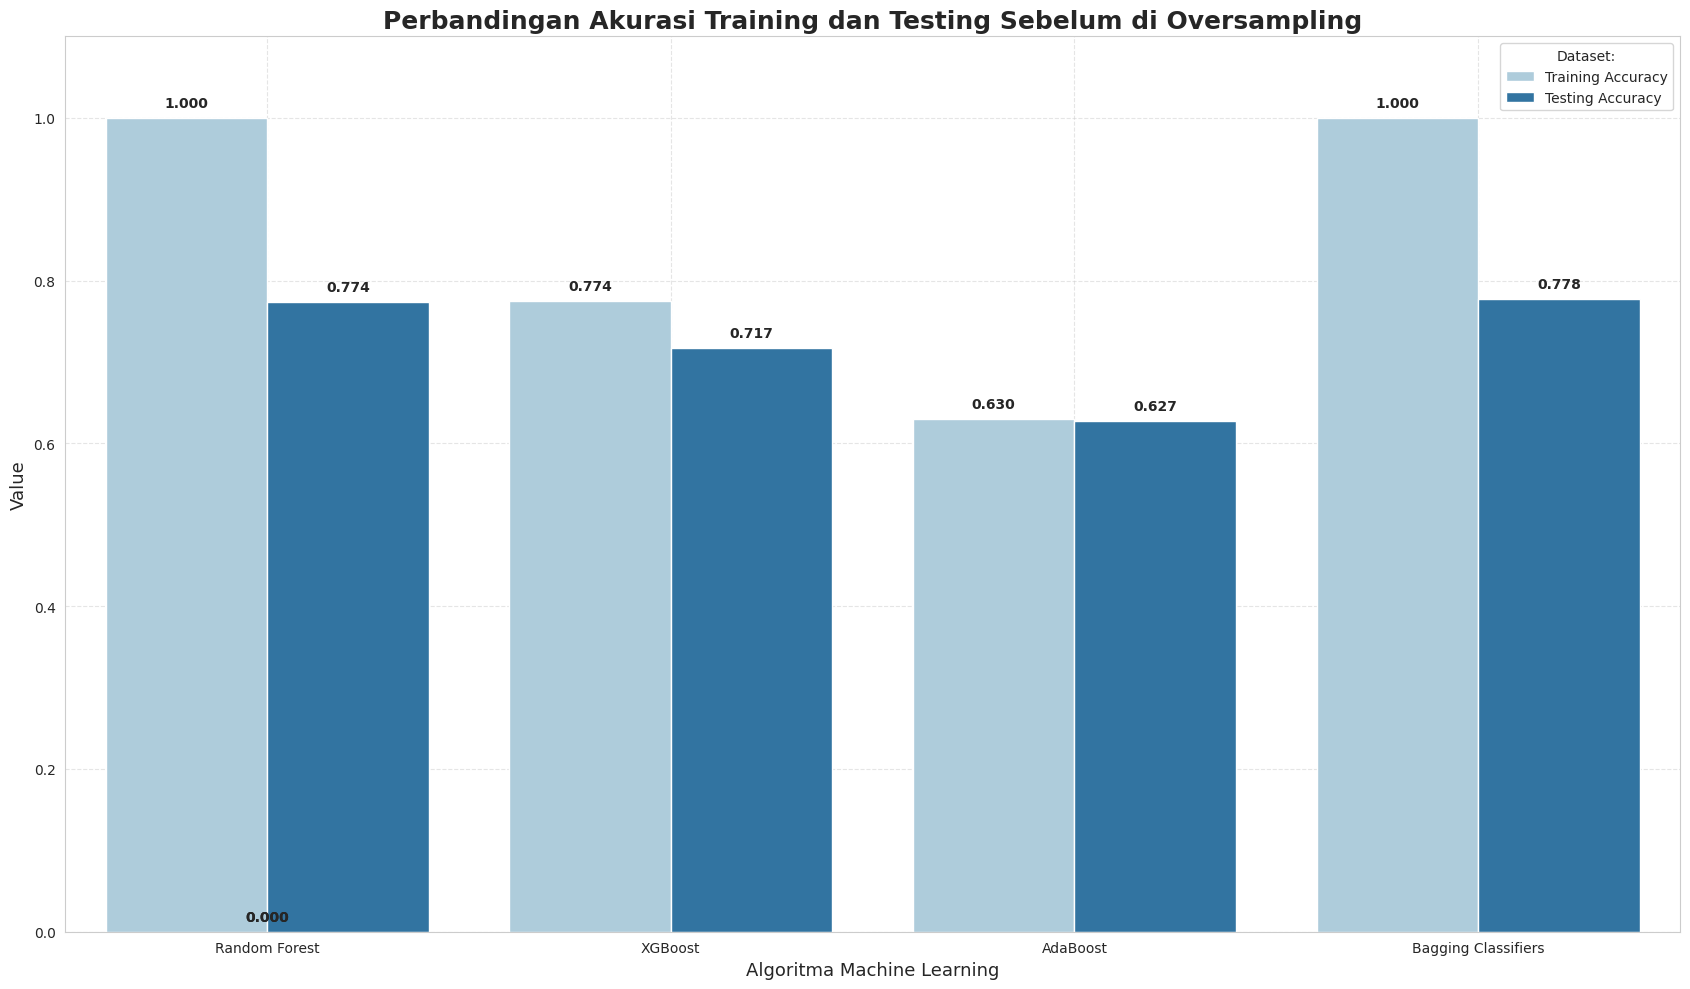

In [ ]:
plt.figure(figsize=(15,8)) # Membuat figure dengan ukuran 15x8 inci untuk memastikan visualisasi lebih jelas

# Membuat daftar nama model yang digunakan
models = ['Random Forest',
          'XGBoost',
          'AdaBoost',
          'Bagging Classifiers']

# Menyimpan nilai akurasi training untuk setiap model
train_acc = [rf_train_accuracy,
             xgb_train_accuracy,
             ab_train_accuracy,
             bc_train_accuracy]

# Menyimpan nilai akurasi testing untuk setiap model
test_acc = [rf_test_accuracy,
            xgb_test_accuracy,
            ab_test_accuracy,
            bc_test_accuracy]

# Membuat DataFrame yang menyimpan model dan akurasi training serta testing
performance_df = pd.DataFrame({'Model': models,
                               'Training Accuracy': train_acc,
                               'Testing Accuracy': test_acc})

# Mengubah format DataFrame menjadi bentuk long format (untuk memudahkan visualisasi)
performance_acc = performance_df.melt(id_vars='Model',  # Kolom 'Model' tetap
                                      # Kolom yang akan dilebur
                                      value_vars=['Training Accuracy',
                                                  'Testing Accuracy'],
                                      var_name='Datasets', # Nama baru untuk kolom kategori
                                      value_name='Accuracy') # Nama baru untuk kolom nilai akurasi

 # Membuat figure baru dengan ukuran 17x10 inci untuk visualisasi
plt.figure(figsize=(17,10))

# Membuat diagram batang dengan seaborn untuk membandingkan akurasi training dan testing
ax = sns.barplot(data=performance_acc, # Data yang digunakan
                 x='Model', # Sumbu X menampilkan nama model
                 y='Accuracy', # Sumbu Y menampilkan nilai akurasi
                 hue='Datasets',  # Warna batang didasarkan pada kategori 'Training' atau 'Testing'
                 palette='Paired')  # Menggunakan palet warna 'Paired' untuk perbedaan visual yang jelas


# Menambahkan teks label nilai akurasi di atas masing-masing batang pada diagram
for p in ax.patches:
  height = p.get_height()  # Mendapatkan tinggi batang
  ax.text(p.get_x() + p.get_width() / 2.,  # Menempatkan teks di tengah batang
          height + 0.01,  # Meletakkan teks sedikit di atas batang
          f'{height:.3f}', # Format angka menjadi tiga desimal
          ha='center', # Posisikan teks di tengah secara horizontal
          va='bottom', # Posisikan teks di bawah secara vertikal
          fontsize=10,  # Ukuran font 10
          fontweight='bold')   # Menggunakan font bold

# Menambahkan judul untuk plot
plt.title('Perbandingan Akurasi Training dan Testing Sebelum di Oversampling', fontsize=18, fontweight='bold')

# Menambahkan label pada sumbu X dan Y
plt.xlabel('Algoritma Machine Learning', fontsize=13)
plt.ylabel('Value', fontsize=13)

# Menambahkan legenda untuk membedakan antara akurasi training dan testing
plt.legend(title='Dataset:',
           loc='best')

plt.ylim(0, 1.1) # Menentukan batas sumbu Y dari 0 hingga 1.1 agar nilai terlihat lebih jelas
plt.grid(True, linestyle='--', alpha=0.5) # Menambahkan grid dengan garis putus-putus dan transparansi untuk kemudahan membaca grafik
plt.tight_layout() # Mengatur tata letak agar lebih rapi
plt.show() # Menampilkan plot

## Klasifikasi Report Sebelum Dilakukan Oversampling Dengan SMOTE

In [ ]:
# Function to evaluate classification models
# Fungsi evaluate_model bertujuan untuk mengevaluasi performa model klasifikasi berdasarkan hasil prediksi dan probabilitasnya
def evaluate_model(y_test, predictions, probabilities, model_name): # y_test adalah Label asli; predictions adalah label yang diprediksi; probabilities adalah probabilitas outpunya; model_name adalah nama model yang di evaluasi.
  unique_classes = np.unique(y_test) # mengambil daftar kelas unik dari y_test.
  target_names = label_encoder.classes_[unique_classes] # label_encoder.classes_ adalah daftar semua kelas sebelum dilakukan encoding

  report = classification_report(y_test, predictions, target_names=target_names) # Menghasilkan laporan klasifikasi

  # Menormalisasi Probabilitas Kelas
  # Mengambil probabilitas hanya untuk kelas yang ada di y_test. Menormalisasi probabilitas agar totalnya selalu 1 per sampel.
  probabilities_filtered = probabilities[:, unique_classes]
  probabilities_normalized = probabilities_filtered/probabilities_filtered.sum(axis=1, keepdims=True)
  # One-vs-Rest (OvR): Menghitung AUC untuk setiap kelas dengan menganggapnya sebagai positif vs lainnya.
  roc_auc = roc_auc_score(y_test, probabilities_normalized, multi_class='ovr')    # Menghitung ROC AUC Score 9mengukur kemampuan model membedakan antara kelas)

  # Print model evaluation results
  print(f'Model: {model_name}')
  print(report)
  print('-' * 100)
  print(f'ROC_AUC Score: {roc_auc:.4f}')
  print('-' * 100)
  print('\n')

# Evaluate various models
evaluate_model(y_test, rf_pred, rf_prob, 'Random Forest')
evaluate_model(y_test, xgb_pred, xgb_prob, 'XGBoost')
evaluate_model(y_test, ab_pred, ab_prob, 'AdaBoost')
evaluate_model(y_test, bc_pred, bc_prob, 'Bagging Classifiers')

Model: Random Forest
              precision    recall  f1-score   support

        Good       0.73      0.67      0.70      4422
        Poor       0.78      0.78      0.78      7313
    Standard       0.78      0.81      0.79     13265

    accuracy                           0.77     25000
   macro avg       0.76      0.75      0.76     25000
weighted avg       0.77      0.77      0.77     25000

----------------------------------------------------------------------------------------------------
ROC_AUC Score: 0.9031
----------------------------------------------------------------------------------------------------


Model: XGBoost
              precision    recall  f1-score   support

        Good       0.64      0.59      0.61      4422
        Poor       0.73      0.69      0.71      7313
    Standard       0.73      0.77      0.75     13265

    accuracy                           0.72     25000
   macro avg       0.70      0.68      0.69     25000
weighted avg       0.72      0.

### Analisis dan Interpretasi:
  * Untuk metode ensembel learning dari teknik **bagging** yaitu **bagging classifier** dan **random forest** memiliki performa model yang terbaik dengan akurasi prediksi mencapai **skor 77% - 78%** dan ROC_AUC skor yang didapatkan adalah 91%, menunjukkan kemampuan model untuk membedakan kelas dengan baik. tapi, jika dilihat dari akurasi model training, model menghasilkan overfitting, hal ini karena model belum diberikan paramater yang sesuai dengan kebutuhan model.
  *  Untuk metode ensembel learning dari teknik **boosting** yaitu **XGBoost** memiliki evaluasi performa model yang rendah dari metode ensemble learning untuk teknik bagging. **XGBoost** memberikan hasil skor **prediksi model 72%** dan **ROC_AUC skor sebesar 86%**, sedangkan untuk AdaBoost menghasilkan model prediksi terendah yang hanya menghasilkan **63%** dengan **ROC_AUC skor 78%.** **AdaBoost** dalam khasus ini menunjukkan kesulitan untuk memberikan hasil prediksi model dari beberapa kelas.
  * Random Forest:
    * **Akurasi 77%** dengan skor **ROC_AUC 90%** menjadikan model ini yang paling bagus untuk melakukan klasifikasi model.
    * tapi, untuk kelas **Good** model **random forest** hanya memiliki **recall 67%** artinya untuk kelas **Good** model mengalami kesulitan untuk mengklasifikasi atau mengenali kelas dibandingkan kelas lain.
    * untuk kelas **standard** memiliki performa model terbaik dengan **recall 81%** menunjukkan model cukup andal dalam mengidentifikasi kategori ini.
  * XGBoost:
    * Akurasi lebih rendah hanya memiliki skor **akurasi 72%**.
    * **precision dan recall** lebih rendah dibandingkan random forest, terutama untuk kelas **Good** (**recall hanya 59%**)
    * **ROC_AUC** juga lebih rendah yaitu **86%**, menunjukkan bahwa model kurang bisa membedakan kelas dengan baik.
    * XGBoost membutuhkan teknik hyperparameter tuning untuk memasang parameter estimator terbaik untuk meningkatkan model prediksi.
  * AdaBoost:
    * **Akurasi** yang paling rendah **63%** menunjukkan model kurang efektif dalam klasifikasi.
    * kelas **"Good"** memiliki **recall hanya 16%** artinya banyak data **"Good"** salah diklasifikasikan ke kelas lain.
    * **ROC_AUC skor 78%** juga paling rendah. menunjukkan kesulitan model dalam membedakan kelas.
    * dengan hasil seperti ini model ini kurang cocok untuk digunakan dalam khasus datasets ini karena performa yang diberikan jauh lebih rendah dibandingkan model lainnya.
  * Bagging Classifier:
    * akurasi yang paling tinggi dari semua algoritma yang digunakan dengan **akurasi 78%**. sedikit lebih baik dari Random Forest.
    * **Precision, recall, dan f1-score** seimbang di semua kelas.
    * **ROC AUC Score 90%**, hampir setara dengan Random Forest.
    * Bagging Classifier adalah model terbaik dalam evaluasi ini.

## Perbandingan Score Akurasi model vs ROC_AUC Score Sebelum Dilakukan Oversampling dengan SMOTE

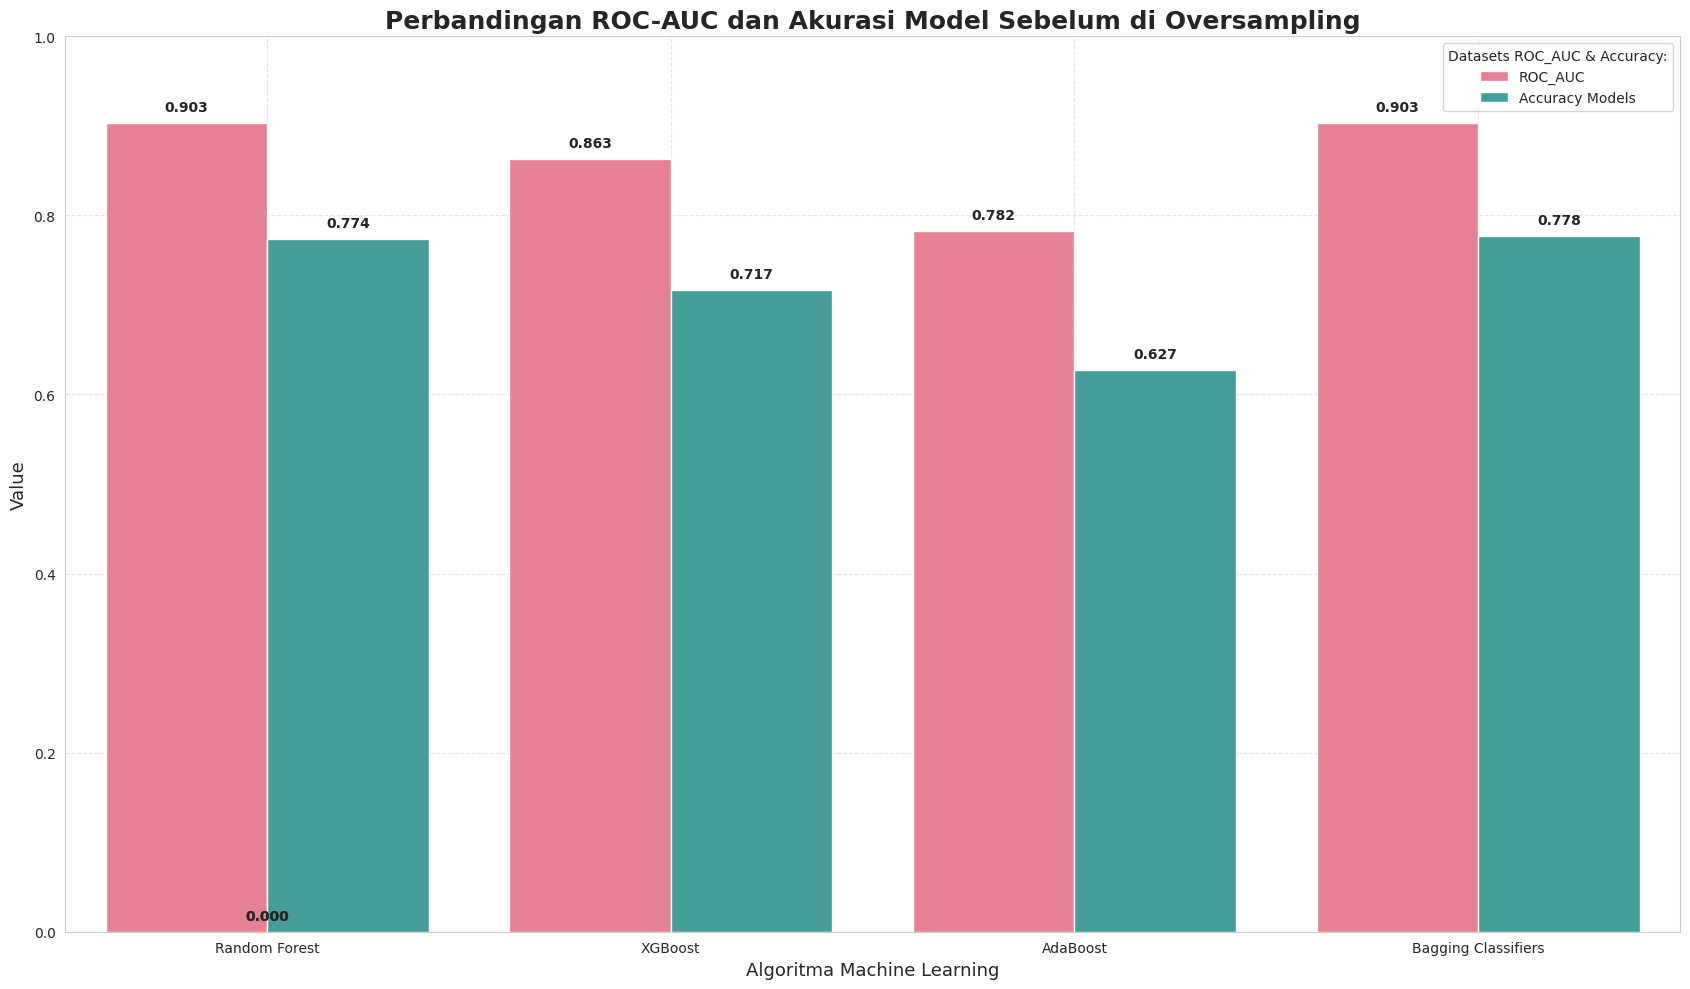

In [ ]:
# Menghitung skor ROC-AUC untuk setiap model yang diuji
roc_auc_scores = [roc_auc_score(y_test, rf_prob, multi_class='ovr'),
                  roc_auc_score(y_test, xgb_prob, multi_class='ovr'),
                  roc_auc_score(y_test, ab_prob, multi_class='ovr'),
                  roc_auc_score(y_test, bc_prob, multi_class='ovr')]

# Membuat DataFrame untuk menyimpan hasil ROC-AUC dan akurasi model
performance_df_acc_ROC_AUC = pd.DataFrame({'Model': models, # List nama model
                                           'ROC_AUC': roc_auc_scores, # Skor ROC-AUC
                                           'Accuracy Models': test_acc}) # Akurasi model


# Melakukan transformasi DataFrame agar lebih mudah divisualisasikan dalam bentuk barplot
perfomance_acc_ROC_AUC = performance_df_acc_ROC_AUC.melt(id_vars='Model',  # Kolom yang tidak diubah
                                                         value_vars=['ROC_AUC',
                                                                     'Accuracy Models'],   # Kolom yang akan dilebur
                                                         var_name='Datasets ROC_AUC & Acc',  # Nama variabel baru
                                                         value_name='ROC_AUC & Acc') # Nama nilai baru

# Membuat figure dengan ukuran tertentu untuk visualisasi
plt.figure(figsize=(17,10))

# Membuat barplot menggunakan seaborn untuk membandingkan ROC-AUC dan akurasi model
ax = sns.barplot(data=perfomance_acc_ROC_AUC,
                 x='Model',  # Sumbu X berisi nama model
                 y='ROC_AUC & Acc',  # Sumbu Y berisi nilai ROC-AUC dan akurasi
                 hue='Datasets ROC_AUC & Acc',  # Pewarnaan berdasarkan tipe metrik (ROC-AUC atau akurasi)
                 palette='husl') # Menggunakan palet warna 'husl'

# Menambahkan label angka pada setiap bar di dalam plot
for p in ax.patches:
  height = p.get_height()  # Mendapatkan tinggi setiap bar
  ax.text(p.get_x() + p.get_width() / 2.,   # Menempatkan teks di tengah bar
          height + 0.01,   # Sedikit di atas bar
          f'{height:.3f}',  # Format angka dengan 3 desimal
          ha='center', # Posisi horizontal di tengah
          va='bottom',  # Posisi vertikal di bawah
          fontsize=10,
          fontweight='bold')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan ROC-AUC dan Akurasi Model Sebelum di Oversampling', fontsize=18, fontweight='bold')
plt.xlabel('Algoritma Machine Learning', fontsize=13)
plt.ylabel('Value', fontsize=13)

# Menambahkan legenda untuk membedakan ROC-AUC dan akurasi
plt.legend(title='Datasets ROC_AUC & Accuracy:',
           loc='best')
plt.ylim(0, 1.0) # Mengatur batas nilai sumbu Y dari 0 hingga 1
plt.grid(True, linestyle='--', alpha=0.5)   # Menambahkan grid dengan garis putus-putus untuk membantu membaca nilai
plt.tight_layout()   # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()   # Menampilkan plot

## Confusion Matriks Sebelum Dilakukan Oversampling dengan SMOTE

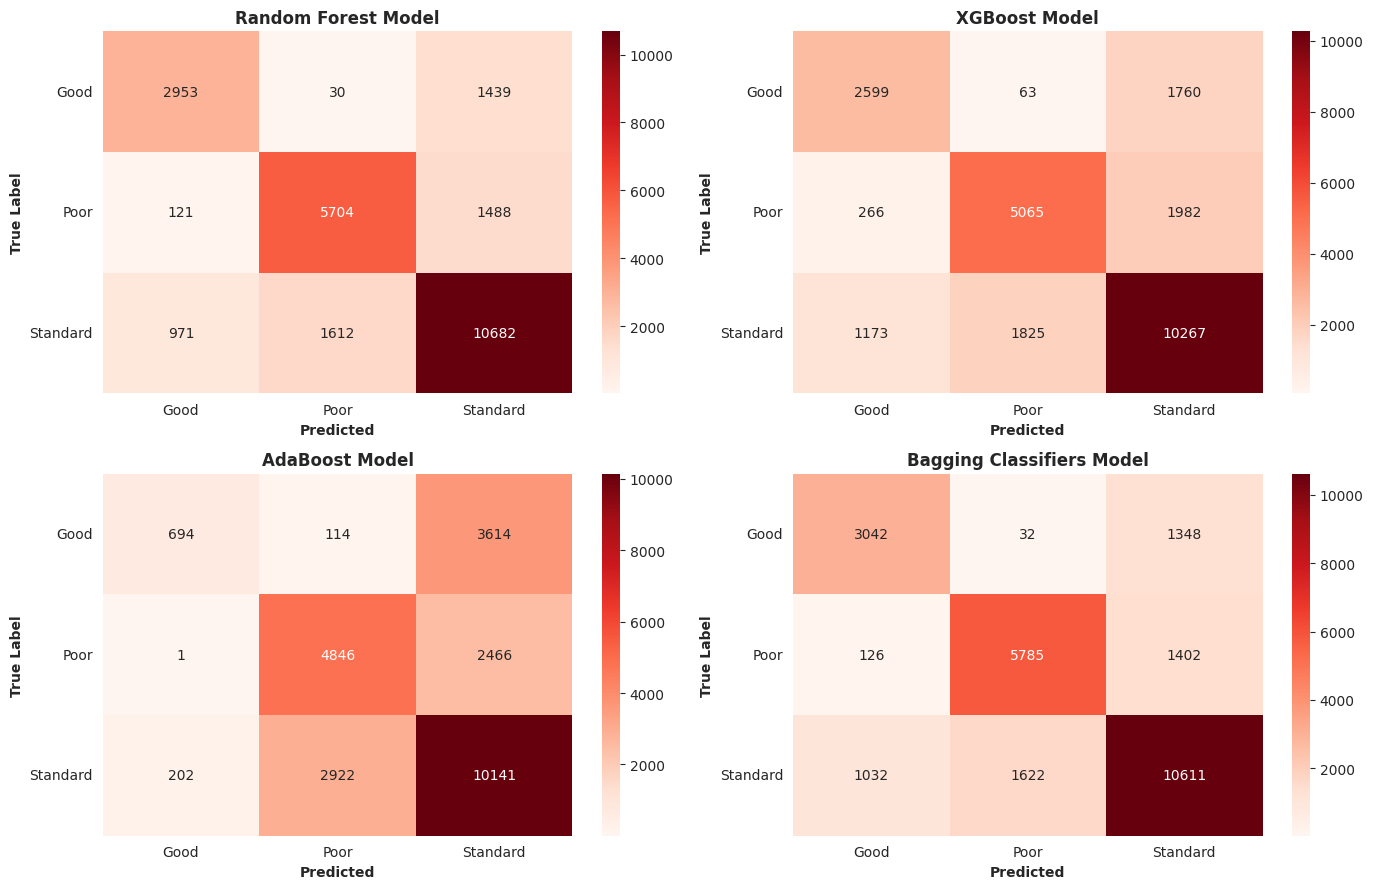

In [ ]:
# menentukan kelas unik yang ada dalam data testing (y_test)
unik_kelas = np.unique(y_test)
# menggunakan Label Encoder untuk mendapatkan label kelas asli yang sesuai dengan indeks unik di y_test
target_labels = label_encoder.classes_[unik_kelas]

# membuat dictionary yang menyimpan prediksi dari berbagai model machine learning
models_pred = {'Random Forest Model': rf_pred, # untuk model Random Forest
               'XGBoost Model': xgb_pred,  # untuk model XGBoost
               'AdaBoost Model': ab_pred, # untuk model AdaBoost
               'Bagging Classifiers Model': bc_pred} # untuk model Bagging classifiers

# membuat subplot dengan ukuran 2x2 untuk menampilkan confusion matrix dari setiap model
fig, axes = plt.subplots(2,2, figsize=(14,9)) # 2 baris, 2, kolom, ukuran 14x9 inchi
axes = axes.flatten() # untuk mengubah array 2D menjadi 1D agar lebih mudah diakses dalam loop

# melakukan iterasi untuk setiap model dan prediksinya untuk memplot confusion matrix
for ax, (model_name, predictions) in zip(axes, models_pred.items()):
  cm = confusion_matrix(y_test, predictions) # membuat confusion matrix berdasarkan label sebenarnya (y_test) dan prediksi model

  # menampilkan confusion matrix sebagai heatmap menggunakan seaborn
  sns.heatmap(cm,
              annot=True,  # menampilkan angka dalam setiap sel
              fmt='d',  # format angka desimal
              cmap='Reds',  # skema warna merah
              xticklabels=target_labels,  # label untuk sumbu X (prediksi)
              yticklabels=target_labels,  # label untuk sumbu Y (label asli)
              ax=ax)  # menampilkan subplot yang digunakan.

  # menampilkan judul dan label pada setiap subplot
  ax.set_title(f'{model_name}', fontsize=12, fontweight='bold')  # judul subplot
  ax.set_ylabel('True Label', fontsize=10, fontweight='bold')  # label sumbu Y
  ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')  # label sumbu X

  # mengatur rotasi label sumbu untuk meningkatkan keterbacaan
  ax.tick_params(axis='x', labelrotation=0)  # tidak ada rotasi pada sumbu X
  ax.tick_params(axis='y', labelrotation=0) # tidak ada rotasi pada sumbu Y

plt.tight_layout() # Menyesuaikan tata letak agar subplot tidak saling tumpang tindih
plt.show()   # Menampilkan semua confusion matrix dalam satu frame

### Insight dari Evaluasi Model Performance:
  * True Positif (TP): jumlah sample yang benar-benar positif dan diprediksi sebagai positif oleh model.
  * True Negatif (TN): jumlah sample yang benar-benar negatif dan diprediksi sebagai negatif oleh model.
  * False Positif (FP): jumlah sample yang sebenarnya negatif tetapi diprediksi sebagai positif oleh model.
  * False Negatif (FN): jumlah sample yang sebenarnya positif tetapi diprediksi negatif oleh model.
  * akurasi: adalah proporsi prediksi yang benar terhadap seluruh data.
  * precision: proporsi sample yang diprediksi positif yang benar-benar positif.
  * recall : proporsi sample positif yang berhasil dideteksi oleh model.
  * f1-score: harmonic mean antara precision dan recall.
  * ROC-AUC (Receiver Operating Characteristic - Area Under Curve): Metrik yang mengukur kemampuan model dalam membedakan kelas positif dan negatif.
  * ROC curve dibuat dengan memplot True Positive Rate (TPR) vs. False Positive Rate (FPR).
  * AUC (Area Under Curve) bernilai antara 0-1, semakin tinggi AUC, semakin baik model dalam membedakan kelas positif dan negatif.

### Analisis dan Interpretasi:
  * Random Forest Model:
    * Akurasi = 77%
    * ROC_AUC = 90%
    * interpretasi:
      * model ini memiliki performa yang cukup baik dengan **recall** tertinggi pada kelas **standard** (**10682** **True Positif** dari **13265**)
      * namun, terjadi beberapa kesalahn klasifikasi, terutama dalam membedakan kelas **standard** dengan kelas **poor** dan **good**.
      * kelebihan adalah model memiliki kesimbangan yang baik antara **recall** dan **precision**.
      * kekurangan adalah masih terdapat kesalahan prediksi terutama pada kelas **"standard"** yang diklasifikasikan sebagai **"good".**
      * perlu untuk dilakukan perlu sedikit perbaikan pada penanganan kelas minoritas.
  * XGBoost Model:
    * Akurasi: 72%
    * ROC_AUC = 86%
    * Interpretasi:
      * masih cukup baik dalam membedakan kelas secara keseluruhan, tetapi tidak sebaik **random forest**
      * lebih konservatif dalam klasifikasi kelas **"standard"** dengan **10267 prediksi benar** dari **13265**.
      * bisa ditingkatkan dengan teknik **fine-tuning hyperparameter** atau **feature engineering.**
  * AdaBoost Model:
    * Akurasi: 63%
    * ROC_AUC: 78%
    * Interpretasi:
      * model ini memiliki akurasi yang paling rendah diantara model lainnya.
      * masih cukup baik dalam mengenali kelas **"standard"**, meskipun lebih rendah dibandingkan model lainnya.
      * perlu untuk melakukan perbaikan dengan oversampling, feature selection, atau hyperparameter tuning dengan menggabungkan dengan model estimator.
  * Bagging Classifiers Model:
    * Akurasi 78%
    * ROC_AUC 91%
    * interpretasi:
      * Model ini memiliki performa yang hampir setara dengan **Random Forest.**
      * **Recall** pada kelas **"Standard"** cukup tinggi **(10611 dari 13265 benar)**, menunjukkan model ini cukup baik dalam menangani **kelas mayoritas.**
      * Lebih sedikit kesalahan klasifikasi dibandingkan **XGBoost** dan **AdaBoost.**
      * Kelebihan: Model ini stabil dan memiliki performa yang lebih baik dibandingkan **XGBoost** dan **AdaBoost.**
      * Kekurangan: Masih terjadi kesalahan klasifikasi pada kelas **"Good"** dan **"Poor".**

## Perbandingan Skore F1, Precision, dan Recall dari Model Performa Sebelum Dilakukan Oversampling dengan SMOTE

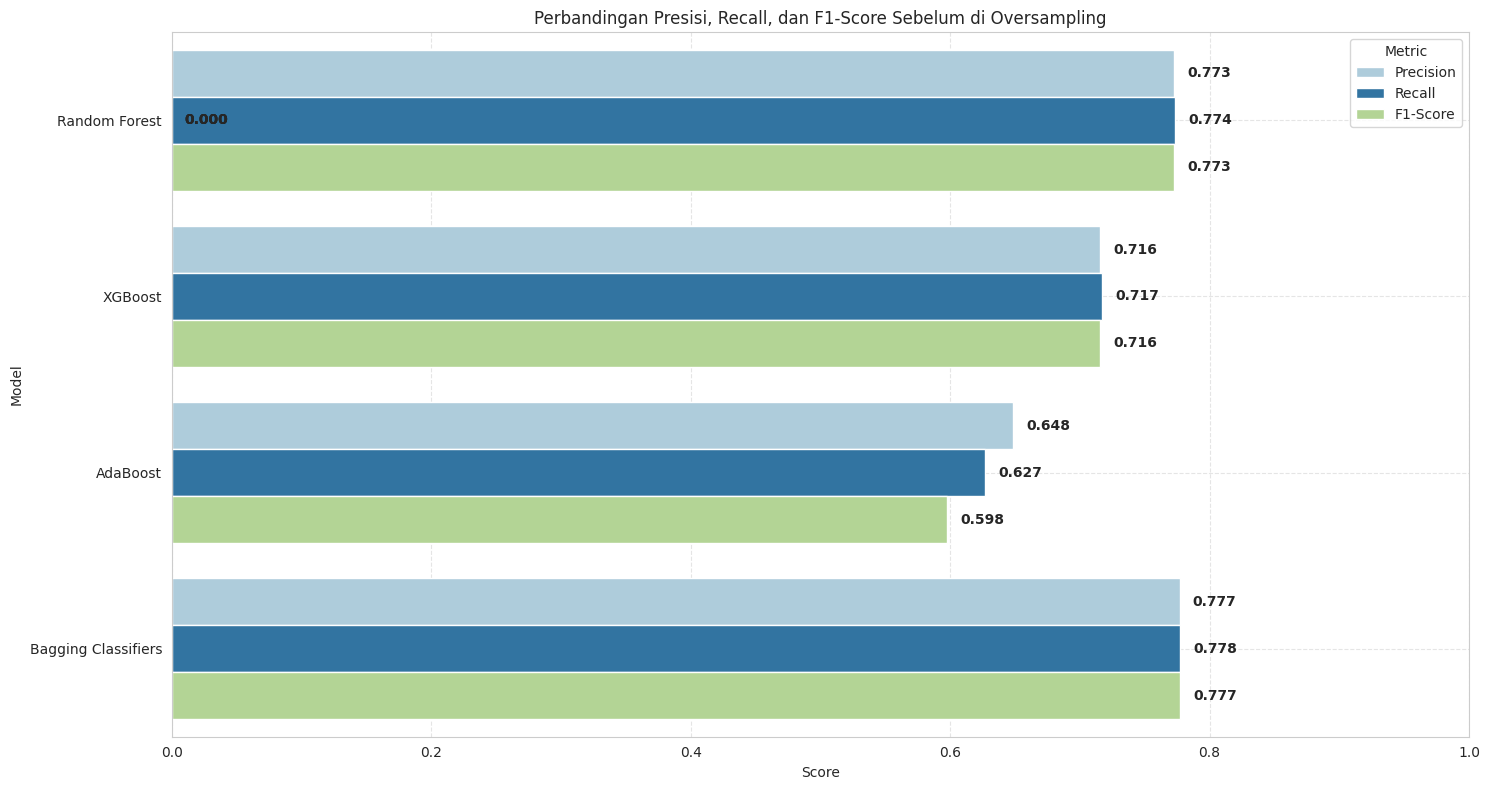

In [ ]:
metrics_list = []   # membuat list kosong untuk menyimpan metrik evaluasi dari masing-masing model
# melakukan iterasi untuk setiap model dengan hasil prediksinya
for name, pred in models_pred.items():
    # menghitung precision, recall, dan f1-score dengan rata-rata berbobot (weighted)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')

    # menambahkan hasil evaluasi ke dalam list sebagai dictionary
    metrics_list.append({'Model': name.replace(' Model', ''),  # menghapus kata " Model" dari nama model untuk tampilan yang lebih rapih.
                         'Precision': precision,
                         'Recall': recall,
                         'F1-Score': f1})

# mengonversi list dictionary menjadi dataframe pandas
metrics_df = pd.DataFrame(metrics_list).melt(id_vars='Model') # Mengubah format dataframe menjadi long format agar lebih mudah digunakan dengan Seaborn

# membuat visualisasi menggunakan seaborn
plt.figure(figsize=(15, 8)) # menentukan ukuran figure
ax = sns.barplot(x='value', # sumbu X adalah nilai numerik
                 y='Model', # sumbu Y adalah nama model
                 hue='variable',  # warna berdasarkan metrik (precision, recall, f1-score)
                 data=metrics_df,
                 palette='Paired')  # menggunakan palet warna yang berbeda

# menambahkan label angka pada setiap batang grafik untuk memudahkan interpretasi
for p in ax.patches:
    width = p.get_width()  # Mendapatkan panjang batang (nilai metrik)
    height = p.get_y() + p.get_height() / 2   # Menentukan posisi vertikal teks
    ax.text(width + 0.01,   # Posisi teks sedikit di sebelah kanan batang
            height,
            f'{width:.3f}',  # Format angka dengan 3 desimal
            ha='left',   # Penempatan teks di sebelah kiri
            va='center',  # Penempatan teks di tengah tinggi batang
            fontsize=10,
            fontweight='bold')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Presisi, Recall, dan F1-Score Sebelum di Oversampling')
plt.xlabel('Score')  # Label sumbu X
plt.ylabel('Model') # Label sumbu Y
plt.legend(title='Metric')  # Menambahkan legenda dengan judul 'Metric'
plt.xlim(0, 1.0)   # Mengatur batas nilai pada sumbu X (karena skor metrik berkisar antara 0-1)
plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid dengan garis putus-putus transparan
plt.show() # Menampilkan plot

### Analisis dan Interpretasi:

* precision akan memberikan seberapa banyak prediksi positif yang benar.
* recall akan memberikan seberapa baik model menangkap semua sample positif.
* f1-score akan memberikan rata-rata harmonis dari precision dan recall

# Class Imbalance: Oversampling menggunakan SMOTE

In [ ]:
class_counts = Counter(y) # menghitung distribusi kelas dalam dataset terget (y)
print("Distribusi kelas asli:", class_counts) # menampilkan jumlah sample untuk setiap kelas dalam bentuk dictionary

Distribusi kelas asli: Counter({2: 53174, 1: 28998, 0: 17828})


In [ ]:
label_encoder = LabelEncoder() # inisialisasi label encoder untuk mengonversikan label encoder menjadi angka.
# mengubah nilai kategori dalam kolom "credit_score" menjadi nilai numerik
df_analisis['Credit_Score_Encoded'] = label_encoder.fit_transform(df_analisis['Credit_Score'])

# menentukan daftar fitur variable (X) yang akan digunakan dalam model training
fitur = [
    'Payment_Behaviour_Score', # skor perilaku pembayaran
    'Payment_Min_Indicator',  # indikator apakah pembayaran minimum dilakukan
    'Debt_to_Income_Ratio',  # rasio utang terhadap pendapatan
    'Credit_Utilization_Ratio',  # rasio penggunaaan kredit
    'Monthly_Balance',   # saldo bulanan
    'Total_EMI_per_month',  # total pembayaran EMI per bulan
    'Occupation_Encode',  # pekerjaan dalam bentuk numerik
    'Credit_History_Months',  # lama riwayat kredit dalam bulan
    'Num_Credit_Card',  # jumlah kartu kredit yang dimiliki
    'Num_Bank_Accounts',  # jumlah rekening bank yang dimiliki
    'Age',                  # usia pemohon
    'Outstanding_Debt',    # total utang yang masih harus dibayar
    'Delay_from_due_date',   # rata-rata keterlambatan pembayaran dari tanggal jatuh tempo
    'Interest_Rate',     # suku bunga
    'Amount_invested_monthly'  # jumlah investasi perbulan
]


# memisahkan fitur dari variabel X dan target dari variable Y
x = df_analisis[fitur]   # data fitur untuk model
y = df_analisis['Credit_Score_Encoded']   # target yang akan di encoding

x = x.fillna(x.mean())      # menangani nilai yang hilang (missing values) dengan mengganti nilai NaN dengan rata-rata kolom


# # Menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan data
# smote = SMOTE(random_state=42)
# x_resampled, y_resampled = smote.fit_resample(x,y)

# # Menggunakan SMOTE + Tomek Links
# smote_tomek = SMOTETomek(random_state=42)
# x_resampled, y_resampled = smote_tomek.fit_resample(x, y)

# Menggunakan SMOTE + Edited Nearest Neighbors (ENN)
smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)


# Mengonversi kembali hasil resampling ke dalam DataFrame untuk analisis lebih lanjut
df_analisis_balanced = pd.DataFrame(x_resampled, columns=x.columns)
df_analisis_balanced['Credit_Score_Encoded'] = y_resampled

# Menampilkan distribusi kelas setelah oversampling
print('Distribusi Kelas Balance:')
print(df_analisis_balanced['Credit_Score_Encoded'].value_counts(normalize=True) * 100)

Distribusi Kelas Balance:
Credit_Score_Encoded
0    44.741662
1    38.050350
2    17.207988
Name: proportion, dtype: float64


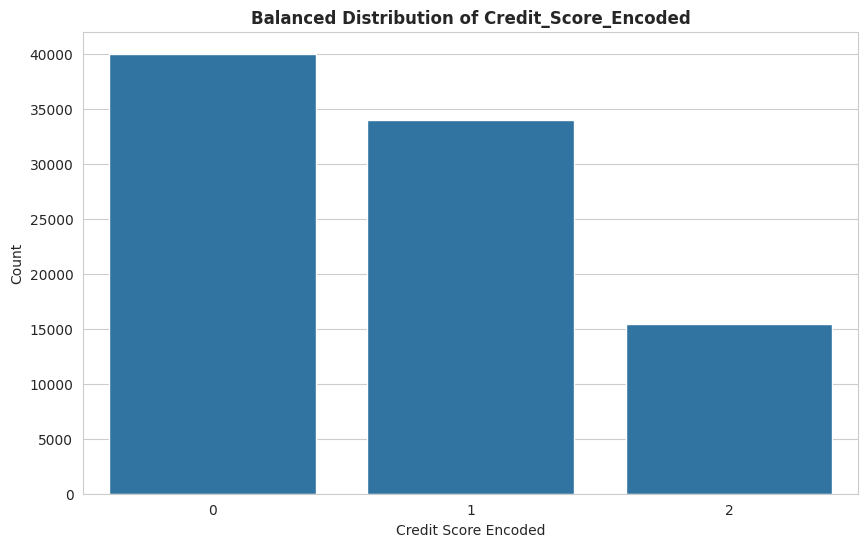

In [ ]:
# Membuat visualisasi distribusi kelas menggunakan countplot
plt.figure(figsize=(10,6)) # Menentukan ukuran figure

# Membuat countplot untuk menampilkan jumlah sampel dari setiap kelas setelah SMOTE
sns.countplot(x='Credit_Score_Encoded',
              data=df_analisis_balanced,
              order=df_analisis_balanced['Credit_Score_Encoded'])   # Menentukan urutan label pada sumbu x

# Menambahkan judul pada plot
plt.title('Balanced Distribution of Credit_Score_Encoded',
          fontsize=12,
          fontweight='bold')

# Memberi label pada sumbu y dan x
plt.ylabel('Count')
plt.xlabel('Credit Score Encoded')
plt.show()  # Menampilkan plot

## Pengenalan Sedikit tentang SMOTE.

saat menangani **ketidakseimbangan kelas (class imbalance)** dalam dataset, kita sering menggunakan SMOTE. namun, SMOTE saja dapat menambahkan sampel sintesis yang memungkinkan tidak terlalu representatif atau **menyebabkan overfitting** yang diakibatkan penambahan data sintesis terhadap data original.

untuk menangani itu, biasanya bisa dikombinaksikan dengan **SMOTE + Tomek Link** atau bisa dengan **SMOTE + Edited Nearest Neighbors (ENN)**.

* SMOTE + Tomek Links:
  * cara kerja: tambah sample sintesis (SMOTE) --> menghapus pasangan tomek links. Pasangan dari dua sampel yang berbeda kelas tetapi sangat berdekatan dalam ruang fitur. Jika ditemukan, sampel dari kelas mayoritas akan dihapus untuk memperjelas batas kelas.
  * kelebihan: membersihkan batas antara kelas, lebih cepat dibandingkan ENN. membantu untuk mengurangi noise dalam data setelah obersampling.
  * kekurangan: **bisa menghapus data yang berguna** jika kelas sangat tumpang tindih.
  * cocok digunakan saat: kelas **minoritas tumpang tindih dengan kelas mayoritas.**

* SMOTE + ENN:
  * cara kerja: tambah sample sintesis (SMOTE) --> hapus sample mayoritas yang "aneh" menggunakan ENN. Untuk setiap sampel, dilihat k tetangga terdekatnya. Jika mayoritas tetangga memiliki label berbeda, sampel tersebut akan dihapus. Menghilangkan outlier & noise di kelas mayoritas.
  * kelebihan: membersihkan noise, membuat batas kelas lebih jelas. Membantu model mempelajari pola yang lebih jelas.
  * kekurangan: bisa menghapus terlalu banyak data, **lebih lambat dibandingkan Tomek.**
  * cocok digunakan saat: dataset **memiliki banyak outlier atau noise.**

# Predictive Modeling and Development Model Sesudah Dilakukan Oversampling dengan SMOTE

# Evaluation dan Metriks Performa Model Sesudah Dilakukan Oversampling dengan SMOTE

In [ ]:
# membagi datasets hasil yang sudah di oversampling menjadi data training dan data testing set (75% untuk training, dan 25% untuk testing)
# Seed untuk replikasi hasil yang sama
# Memastikan proporsi kelas tetap seimbang di train & test set
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

# Penerapan model Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=42) # Membuat model Random Forest dengan 150 pohon keputusan
rf.fit(x_train, y_train)  # Melatih model pada data training
rf_pred = rf.predict(x_test)   # Memprediksi label pada data test
rf_prob = rf.predict_proba(x_test)   # Mendapatkan probabilitas dari tiap kelas

# Penerapan Model XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)  # Model XGBoost dengan 200 pohon dan learning rate 0.1
xgb.fit(x_train, y_train)       # Melatih model
xgb_pred = xgb.predict(x_test)   # Memprediksi label test
xgb_prob = xgb.predict_proba(x_test)    # Probabilitas dari tiap kelas

# Penerapan Model AdaBoost
ab = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)  # Model AdaBoost dengan 200 estimator
ab.fit(x_train, y_train)      # Melatih model
ab_pred = ab.predict(x_test)  # Memprediksi label test
ab_prob = ab.predict_proba(x_test)   # Probabilitas dari tiap kelas

# Penerapan Bagging
bc = BaggingClassifier(n_estimators=150, random_state=42)   # Model Bagging dengan 150 estimator
bc.fit(x_train, y_train)      # Melatih model
bc_pred = bc.predict(x_test)  # Memprediksi label test
bc_prob = bc.predict_proba(x_test)  # Probabilitas dari tiap kelas

## Perbandingan Model Training dan Testing Sesudah Dilakukan Oversampling dengan SMOTE

In [ ]:
## Penerapan Model Random Forest
# Prediksi pada data pelatihan dan data uji
rf_y_train_pred = rf.predict(x_train)
rf_y_test_pred = rf.predict(x_test)

# Menghitung akurasi
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (Random Forest): {rf_train_accuracy:.3f}")
print(f"Akurasi pada data uji (Random Forest): {rf_test_accuracy:.3f}")
print('-'*150)
print('\n')




## Penerapan Model XGBoost
# Prediksi pada data pelatihan dan data uji
xgb_y_train_pred = xgb.predict(x_train)
xgb_y_test_pred = xgb.predict(x_test)

# Menghitung akurasi
xgb_train_accuracy = accuracy_score(y_train, xgb_y_train_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (XGBoost): {xgb_train_accuracy:.3f}")
print(f"Akurasi pada data uji (XGBoost): {xgb_test_accuracy:.3f}")
print('-'*150)
print('\n')




## Penerapan Model AdaBoost
# Prediksi pada data pelatihan dan data uji
ab_y_train_pred = ab.predict(x_train)
ab_y_test_pred = ab.predict(x_test)

# Menghitung akurasi
ab_train_accuracy = accuracy_score(y_train, ab_y_train_pred)
ab_test_accuracy = accuracy_score(y_test, ab_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (AdaBoost): {ab_train_accuracy:.3f}")
print(f"Akurasi pada data uji (AdaBoost): {ab_test_accuracy:.3f}")
print('-'*150)
print('\n')




## Penerapan Model Bagging Classifiers
# Prediksi pada data pelatihan dan data uji
bc_y_train_pred = bc.predict(x_train)
bc_y_test_pred = bc.predict(x_test)

# Menghitung akurasi
bc_train_accuracy = accuracy_score(y_train, bc_y_train_pred)
bc_test_accuracy = accuracy_score(y_test, bc_y_test_pred)

# Cetak hasil akurasi
print(f"Akurasi pada data pelatihan (Bagging Classifiers): {bc_train_accuracy:.3f}")
print(f"Akurasi pada data uji (Bagging Classifiers): {bc_test_accuracy:.3f}")
print('-'*150)
print('\n')

Akurasi pada data pelatihan (Random Forest): 1.000
Akurasi pada data uji (Random Forest): 0.917
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (XGBoost): 0.918
Akurasi pada data uji (XGBoost): 0.892
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (AdaBoost): 0.828
Akurasi pada data uji (AdaBoost): 0.826
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (Bagging Classifiers): 1.000
Akurasi pada data uji (Bagging Classifiers): 0.915
------------------------------------------------------------------------------------------------------------------------------------------------------




<Figure size 1500x800 with 0 Axes>

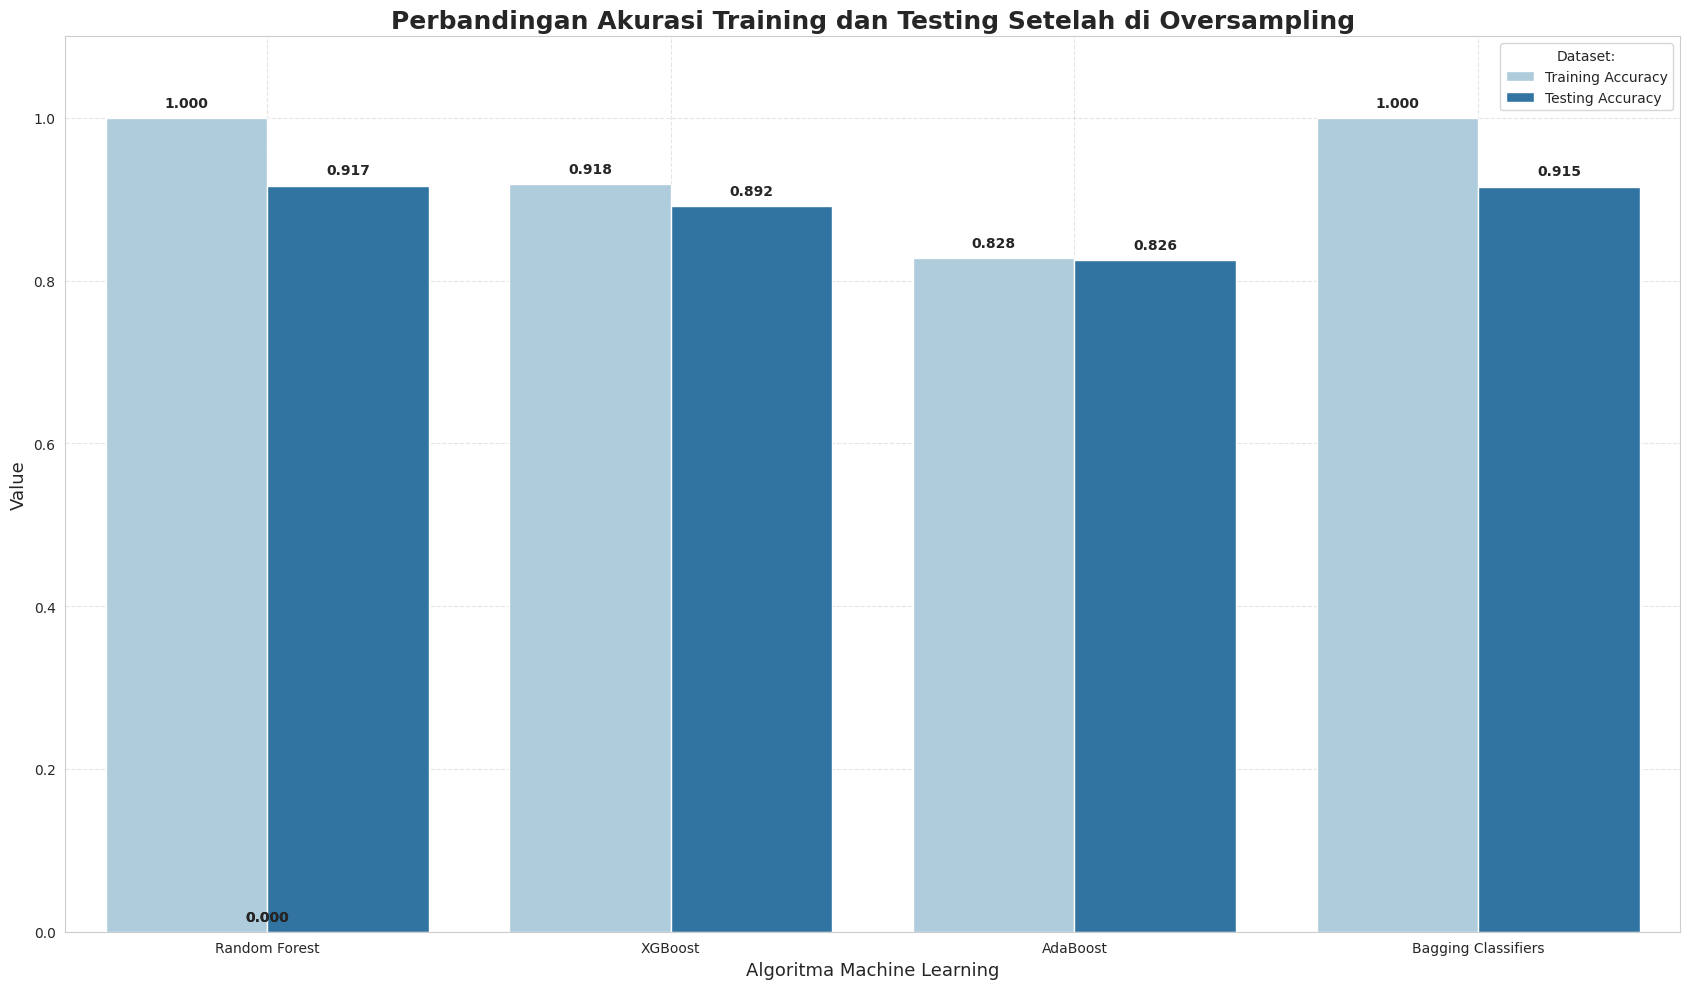

In [ ]:
plt.figure(figsize=(15,8))
models_after_smote = ['Random Forest',
                      'XGBoost',
                      'AdaBoost',
                      'Bagging Classifiers']
train_acc_after_smote = [rf_train_accuracy,
                         xgb_train_accuracy,
                         ab_train_accuracy,
                         bc_train_accuracy]
test_acc_after_smote = [rf_test_accuracy,
                        xgb_test_accuracy,
                        ab_test_accuracy,
                        bc_test_accuracy]
performance_df_after_smote = pd.DataFrame({'Model': models_after_smote,
                                         'Training Accuracy': train_acc_after_smote,
                                         'Testing Accuracy': test_acc_after_smote})
performance_acc_after_smote = performance_df_after_smote.melt(id_vars='Model',
                                                              value_vars=['Training Accuracy',
                                                                          'Testing Accuracy'],
                                                              var_name='Datasets',
                                                              value_name='Accuracy')
plt.figure(figsize=(17,10))
ax = sns.barplot(data=performance_acc_after_smote,
                 x='Model',
                 y='Accuracy',
                 hue='Datasets',
                 palette='Paired')

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2.,
          height + 0.01,
          f'{height:.3f}',
          ha='center',
          va='bottom',
          fontsize=10,
          fontweight='bold')

plt.title('Perbandingan Akurasi Training dan Testing Setelah di Oversampling', fontsize=18, fontweight='bold')
plt.xlabel('Algoritma Machine Learning', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.legend(title='Dataset:',
           loc='best')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Klasifikasi Report Sesudah Dilakukan Oversampling Dengan SMOTE

In [ ]:
# Function to evaluate models by printing classification report and ROC-AUC score
def evaluate_model(y_test, predictions, probabilities, model_name):
  # Normalize probabilities for each class
  unique_classes = np.unique(y_test)
  probabilities_normalized = probabilities/probabilities.sum(axis=1, keepdims=True)

  # Generate classification report
  target_names = label_encoder.classes_[unique_classes]
  report = classification_report(y_test, predictions, target_names=target_names)
  roc_auc = roc_auc_score(y_test, probabilities_normalized, multi_class='ovr')

  # Print model evaluation results
  print(f'Model: {model_name}')
  print(report)
  print('-' * 100)
  print(f'ROC_AUC Score: {roc_auc:.4f}')
  print('-' * 100)
  print('\n')

# Evaluate various models by calling the evaluate_model function with their predictions and probabilities
evaluate_model(y_test, rf_pred, rf_prob, 'Random Forest')
evaluate_model(y_test, xgb_pred, xgb_prob, 'XGBoost')
evaluate_model(y_test, ab_pred, ab_prob, 'AdaBoost')
evaluate_model(y_test, bc_pred, bc_prob, 'Bagging Classifiers')

Model: Random Forest
              precision    recall  f1-score   support

        Good       0.90      0.97      0.93     10015
        Poor       0.94      0.93      0.94      8517
    Standard       0.91      0.74      0.81      3852

    accuracy                           0.92     22384
   macro avg       0.92      0.88      0.90     22384
weighted avg       0.92      0.92      0.91     22384

----------------------------------------------------------------------------------------------------
ROC_AUC Score: 0.9826
----------------------------------------------------------------------------------------------------


Model: XGBoost
              precision    recall  f1-score   support

        Good       0.88      0.95      0.91     10015
        Poor       0.92      0.91      0.91      8517
    Standard       0.84      0.71      0.77      3852

    accuracy                           0.89     22384
   macro avg       0.88      0.85      0.87     22384
weighted avg       0.89      0.

### Analisis dan Interpretasi:

Pada tahap sebelumnya class imbalance secara jelas terlihat bahwa model kurang mampu untuk mengidentifikasi kelas **Good** **Poor** dan **Standard**.
  * kelas **standard** memiliki jumlah sample paling banyak, diikuti oleh **poor** dan **good**.
  * model justru memiliki performa lebih baik untuk kelas **standard** dibandingkan kelas lain.
dari performa yang dilihat bahwa model random forest dan bagging merupakan model terbaik untuk memberikan nilai dari evaluasi performa model dengan **skor prediksi 77%-78%** dan **ROC_AUC skor 90%** walau teridentifikasi overfitting karena model tidak hanya belajar dengan pola tapi juga dipengaruhi oleh **outlier,** hal ini masih belum dipasang **fine-tuning model** untuk memperbaiki akurasi dan performa model. sedangkan untuk **XGBoost** memiliki **skor prediksi 72%** dan skor **ROC_AUC 86%** cukup baik namun masih kalah dengan model **random forest** dan **bagging classifier**. sedangkan untuk **model AdaBoost** memiliki performa terburuk dengan **akurasi 63%** dan **ROC_AUC 78%**.


Untuk mengatasi class imbalance ada teknik yang bisa digunakan atau bisa dicoba semua lalu dibandingkan **teknik class imbalance** mana yang sesuai untuk dipakai dalam meningkatkan skor evaluasi performa model lebih baik. Pada khasus ini penulis menggunakan teknik **SMOTE + Edited Nearest Neighbors (ENN).** Teknik ini digunakan karena bukan hanya mungkin handling class imbalance tetapi bisa juga handling outlier atau noise. walaupun bisa juga menggunakan **SMOTE + Tomek Link**, namun menurut penulis menggunakan teknik SMOTE ENN cukup baik di praktekkan karena bisa menangani handling outlier juga tanpa menghilangkan data yang berguna jika kelas minoritas dan mayoritas terjadi tumpang tindih.


Setelah dilakukan Handling class imbalance dengan **SMOTE + Edited Nearest Neighbors (ENN**) berikut informasi yang dihasilkan berdasarkan classification report.

  * Distribusi data lebih seimbang:
    * jumlah sample lebih proporsional setelah dilakukan **SMOTE (Synthetic Minority Over-sampling Technique)** dan Edited Nearest Neighbors (ENN).
    * **SMOTE** menambahkan sample sintetis ke kelas minoritas, sedangkan **ENN** akan menghapus sample yang berpotensi menyebabkan **missclassifications**, sehingga menghasilkan dataset yang lebih bersih.

  * peningkatan model performa:
    * **Random Forest** dan **Bagging Classifiers** mencapai **akurasi sebesar 92% atau **naik sebesar 14%-15%** dari sebelumnya dan ROC_AUC > 97%** atau tertinggi dari model **boosting**, dan **meningkat 15%** dari sebelumnya. namun akurasi ini kemungkinan perlu diadaptasi dengan **hyperparamater tuning** tahap selanjutnya untuk menghindari **overfitting** untuk menentukan parameter yang bisa meningkatkan performa dari model yang sesungguhnya.
    * **XGBoost** juga memiliki peningkatan performa dari model cukup signifikan **akurasi sebesar 89%** dan **ROC_AUC 97%** atau **naik 17%** dari sebelumnya, walau masih kalah dengan model **bagging** lainnya tapi model **boosting** cukup baik dalam **melewati outlier** agar tidak terjadi **overfitting.** namun model **XGBoost** juga perlu dilakukan **Hyperparameter tuning** agar model lebih sempurna.
    * peningkatan performa model yang lebih significant lagi adalah model **AdaBoost**. model mampu memberikan peninngkatan cukup tinggi secara proporsional dengan teknik handling **class imbalance** yang dari sebelumnya **akurasi 63% menjadi 83%** atau **naik 20%** dari sebelumnya dan **skor ROC_AUC dari 78% menjadi 89%.** meskipun itu, **model AdaBoost** ini memiliki performa terkecil dari keseluruhan model prediksi. Tapi model ini mungkin bisa mengalamai peningkatan kembali lagi jika dikombinasikan dengan **hyperparameter tuning**, **base estimator** dan **weak learners**.

  * peningkatan **Recall** pada kelas **"Good"**.
    * sebelum handling class imbalance, recall kelas **Good** rendah (misalnya untuk **model AdaBosot** yang terkecil yaitu **16%**)
    * setelah di balancing, **recall** kelas **"Good"** meningkat drastis mendekati 97% pada **Random Forest model**, **95%** pada **XGBoost model**, **96%** pada **Bagging Classifiers model**, dan **94%** pada **AdaBoost model**.
    * hal ini menunjukkan dengan penerapan SMOTE+ENN membantu untuk model memprediksi class dengan baik dan mengenalis kelas minoritas setelah di balance.
  
  * performa model pada kelas **"Standard"**
    * meskipun recall kelas **"standard"** **sedikit menurun**, **precision dan f1-score** tetap cukup baik.
    * hal ini menunjukkan bahwa model tidak lagi terlalu bias terhadap **kelas mayoritas**, tetapi tetap dapat mengklasifikasi dengan baik.

  * kesimpulan:
    * bahwa **SMOTE+ENN berhasil** memberikan pengaruh positif untuk perkembangan model klassifikasi untuk mengenali dan membedakan kelas **minoritas "Good"**
    * **akurasi** dan **ROC_AUC meningkat** untuk semua model, tetapi untuk **metode bagging** masih ditemukan **overfitting**, dan untuk **metode boosting** bekerja dengan sangat baik.
    * **AdaBoost** mengalami perbaikan tetapi masih kurang optimal dibandingkan model lain.

  * Rekomendasi:
    * Model terbaik setelah balancing adalah **Random Forest** dan **Bagging Classifier**, karena memiliki **akurasi 92%** dan **ROC AUC > 0.97.** Jika ingin optimasi lebih lanjut, bisa mencoba **hyperparameter tuning** pada **XGBoost** untuk lebih mendekati performa model terbaik.

## Perbandingan Score Akurasi model vs ROC_AUC Score Sesudah Dilakukan Oversampling dengan SMOTE

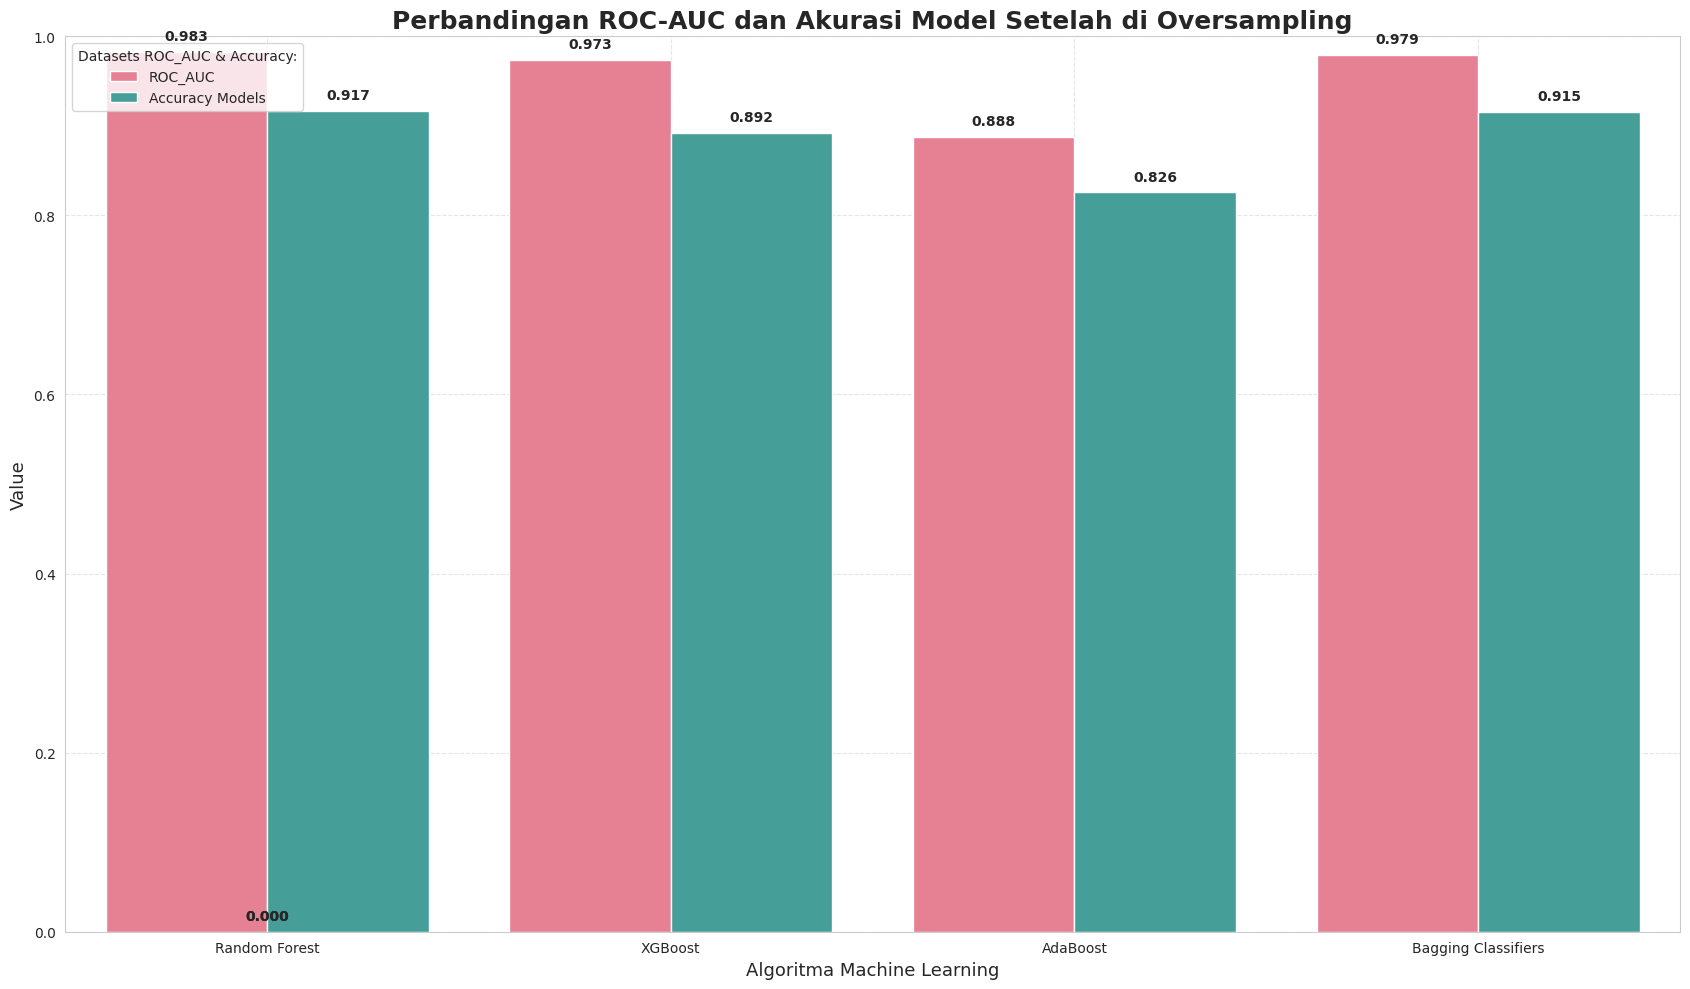

In [ ]:
roc_auc_scores_after_smote = [roc_auc_score(y_test, rf_prob, multi_class='ovr'),
                              roc_auc_score(y_test, xgb_prob, multi_class='ovr'),
                              roc_auc_score(y_test, ab_prob, multi_class='ovr'),
                              roc_auc_score(y_test, bc_prob, multi_class='ovr')]

performance_df_acc_ROC_AUC_after_smote = pd.DataFrame({'Model': models_after_smote,
                                                       'ROC_AUC': roc_auc_scores_after_smote,
                                                       'Accuracy Models': test_acc_after_smote})
perfomance_acc_ROC_AUC_after_smote = performance_df_acc_ROC_AUC_after_smote.melt(id_vars='Model',
                                                                                 value_vars=['ROC_AUC',
                                                                                             'Accuracy Models'],
                                                                                 var_name='Datasets ROC_AUC & Acc',
                                                                                 value_name='ROC_AUC & Acc')

plt.figure(figsize=(17,10))
ax = sns.barplot(data=perfomance_acc_ROC_AUC_after_smote,
                 x='Model',
                 y='ROC_AUC & Acc',
                 hue='Datasets ROC_AUC & Acc',
                 palette='husl')

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2.,
          height + 0.01,
          f'{height:.3f}',
          ha='center',
          va='bottom',
          fontsize=10,
          fontweight='bold')

plt.title('Perbandingan ROC-AUC dan Akurasi Model Setelah di Oversampling', fontsize=18, fontweight='bold')
plt.xlabel('Algoritma Machine Learning', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.legend(title='Datasets ROC_AUC & Accuracy:',
           loc='best')
plt.ylim(0, 1.2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Confusion Matriks Sesudah Dilakukan Oversampling dengan SMOTE

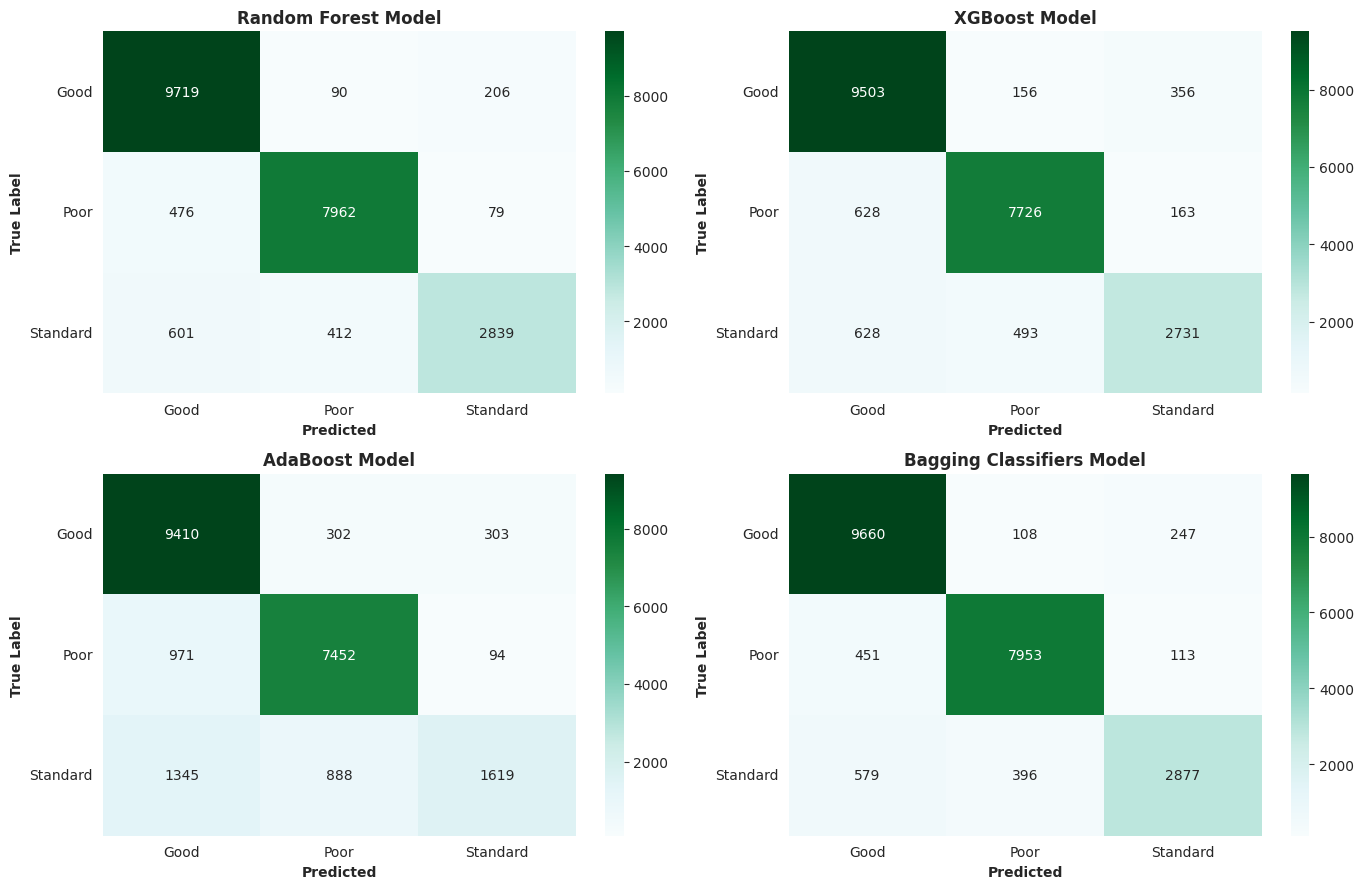

In [ ]:
unik_kelas = np.unique(y_test)
target_labels = label_encoder.classes_[unik_kelas]

# Create a dictionary with the model names as keys and the corresponding predictions as values
models_pred = {'Random Forest Model': rf_pred,
               'XGBoost Model': xgb_pred,
               'AdaBoost Model': ab_pred,
               'Bagging Classifiers Model': bc_pred}

# Create subplots to display all confusion matrices in one frame
fig, axes = plt.subplots(2,2, figsize=(14,9))
axes = axes.flatten()

# Iterate over each model and its predictions to plot confusion matrices
for ax, (model_name, predictions) in zip(axes, models_pred.items()):
  cm = confusion_matrix(y_test, predictions)

  # Plot the confusion matrix using Seaborn's heatmap
  sns.heatmap(cm,
              annot=True,
              fmt='d',
              cmap='BuGn',
              xticklabels=target_labels,
              yticklabels=target_labels,
              ax=ax)

  # Set the title, x-label, and y-label for each plot
  ax.set_title(f'{model_name}', fontsize=12, fontweight='bold')
  ax.set_ylabel('True Label', fontsize=10, fontweight='bold')
  ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')

  # Rotate tick labels for better readability
  ax.tick_params(axis='x', labelrotation=0)
  ax.tick_params(axis='y', labelrotation=0)

plt.tight_layout()
plt.show()

### Analisis dan Interpretasi:

* **Random Forest model:**
  * **Good:**
    * sebelum handling class imbalance **True Positif (TP) = 2953** --> model dengan baik mengidentifikasi banyak sample **kelas good.**
    * sesudah handling class imbalance **True Positif (TP) = 9719** --> performa meningkat signifikan dalam mengidentifikasi **Good.**
    * sebelum handling class imbalance **False Negative (FN) = 1439** --> sebagian besar kesalahan berasal dari prediksi salah menjadi **kelas poor** atau **kelas standard.**
    * sesudah handling class imbalance **False Negative (FN) = 90** --> Kesalahan sangat minim.
    * sebelum class imbalance **False Positif (FP) = 121** --> sedikit kesalahan dalam memprediksi **kelas poor** dan **kelas good.**
    * sesudah handling class imbalance **False Positif (FP) = 476** --> ada sedikit kesalahan dalam memprediksi **Poor** atau **Standard** sebagai **Good.**

  * **Poor:**
    * sebelum handling class imbalance **True Positif (TP) = 5704** --> performa cukup baik dalam mengidentifikasi **kelas poor.**
    * sesudah handling class imbalance **True Positif (TP) = 7962** --> performa tetap baik dalam mengidentifikasi **Poor.**
    * sebelum handling class imbalance **False Negative (FN) = 1488** --> beberapa **kelas poor** diprediksi salah sebagai **kelas standard**.
    * sesudah handling class imbalance **False Negative (FN) = 79** --> Kesalahan sangat minim.

  * **Standard:**
    * sebelum handling class imbalance **True Positif (TP) = 10682** --> performa sangat baik dalam mengidentifikasi kelas **standard** karena kelas mayoritas data berada di kelas ini.
    * sesudah handling class imbalance **True Positif (TP) = 2839** --> performa menurun dibandingkan sebelumnya karena kelas ini sekarang **minoritas.**
    * sebelum class imbalance **False Positif (FP) = 971** --> ada beberapa kesalahan dalam memprediksi **kelas good** atau **kelas poor** sebagai **kelas standard**.
    * sebelum class imbalance **False Positif (FP) = 601** --> ada beberapa kesalahan dalam memprediksi **good** atau **poor** sebagai **standard.**
  
  * **Interpretasi:**
    * peningkatan signifikan: setelah **handling imbalance,** **Random Forest berhasil** meningkatkan performa dalam mengidentifikasi **kelas minoritas "Good"**. ini tercermin dari jumlah TP yang lebih tinggi dan FN yang sangat rendah.
    * Trade-off: kinerja pada kelas standard menurun karena kelas ini sekarang **minoritas** setalah ENN mengurangi jumlahnya.
  

  * **XGBoost Model:**
    * **Good:**
      * sebelum handling class imbalance **True Positif (TP) = 2599** --> performa kurang baik dibandingkan **Random Forest.**
      * sesudah handling class imbalance **True Positif (TP) = 9503** --> performa meningkat signifikan dalam mengidentifikasi **good.**
      * sebelum handling class imbalance **False Negative (FN) = 1760** --> banyak **good** diprediksi salah menjadi **poor** atau **standard.**
      * sesudah handling class imbalance **False Negative (FN) = 156** --> kesalahan sangat minim.
      * sebelum class imbalance **False Positif (FP) = 266** --> ada beberapa kesalahan dalam memprediksi **Poor** atau **standard** sebagai **good.**
      * sesudah class imbalance **False Positif (FP) = 628** --> ada beberapa kesalahan dalam memprediksi **Poor** atau **standard** sebagai **good.**
    * **Poor:**
      * sebelum handling class imbalance **True Positif (TP) = 5065** --> performa cukup baik dalam mengidentifikasi **Poor.**
      * sesudah handling class imbalance **True Positif (TP) = 7726** --> performa tetap baik dalam mengidentifikasi **Poor.**
      * sebelum handling class imbalance **False Negative (FN) = 1982** --> beberapa **poor** diprediksi salah sebagai **standard.**
      * sesudah handling class imbalance **False Negative (FN) = 163** --> kesalahan sangat minim.
    * **Standard:**
      * sebelum handling class imbalance **True Positif (TP) = 10267** --> performa baik dalam mengidentifikasi **standard.**
      * sesudah handling class imbalance **True Positif (TP) = 2731** --> performa menurun dibandingkan sebelumnya karena kelas ini sekarang **minoritas.**
      * sebelum class imbalance **False Positif (FP) = 1173** --> ada beberapa kesalahan dalam memprediksi **good** atau **poor** sebagai **Standard.**
      * sesudah class imbalance **False Positif (FP) = 628** --> ada beberapa kesalahan dalam memprediksi **good** atau **poor** sebagai **standard.**
    * **Interpretasi:**
      * Peningkatan Signifikan : setelah handling imbalance, **XGBoost** juga meningkatkan performa dalam mengidentifikasi **kelas minoritas** **good**.
      * Trade-off : performa pada **kelas standard** menurun karena kelas ini sekarang **minoritas.**
  
  * **AdaBoost Model:**
    * **Good:**
      * sebelum handling class imbalance **True Positif (TP) = 694** --> performa buruk dalam mengidentifikasi **Good.**
      * sesudah handling class imbalance **True Positif (TP) = 9410** --> performa meningkat signifikan dalam mengidentifikasi **good.**
      * sebelum handling class imbalance **False Negative (FN) = 3614** --> banyak **good** diprediksi salah menjadi **poor** atau **standard.**
      * sesudah handling class imbalance **False Negative (FN) = 302** --> Kesalahan masih ada, tetapi jauh lebih baik dibandingkan sebelumnya.
      * sebelum class imbalance **False Positif (FP) = 1** --> ada sedikit kesalahan dalam memprediksi **poor** atau **standard** sebagai **good.**
      * sesudah class imbalance **False Positif (FP) = 971** --> ada beberapa kesalahan dalam memprediksi **poor** atau **standard** sebagai **good.**
    * **Poor:**
      * sebelum handling class imbalance **True Positif (TP) = 4846** --> performa cukup baik dalam mengidentifikasi **poor.**
      * sesudah handling class imbalance **True Positif (TP) = 7452** --> performa tetap baik dalam mengidentifikasi **poor.**
      * sebelum handling class imbalance **False Negative (FN) = 2466** --> beberapa **poor** diprediksi salah sebagai **standard.**
      * sesudah handling class imbalance **False Negative (FN) = 94** --> kesalahan sangat minim.
    * **Standard:**
      * sebelum handling class imbalance **True Positif (TP) = 10141** --> performa baik dalam mengidentifikasi **standard.**
      * sesudah handling class imbalance **True Positif (TP) = 1619** --> performa menurun dibandingkan sebelumnya karena kelas ini sekarang **minoritas.**
      * sebelum class imbalance **False Positif (FP) = 202** --> ada beberapa kesalahan dalam memprediksi **good** atau **poor** sebagai **standard.**
      * sesudah class imbalance **False Positif (FP) = 1345** --> ada beberapa kesalahan dalam memprediksi **good** atau **poor** sebagai **standard.**
    * Interpretasi:
      * Peningkatan Signifikan : setelah handling imbalance, **AdaBoost berhasil** meningkatkan performa dalam mengidentifikasi **kelas minoritas** **good**, meskipun masih ada ruang untuk perbaikan.
      * Trade-off : performa pada kelas **standard** menurun secara signifikan karena kelas ini sekarang **minoritas.**

  * **Bagging Classifier Model:**
    * **Good:**
      * sebelum handling class imbalance **True Positif (TP) = 3042** --> performa baik dalam mengidentifikasi **good.**
      * sesudah handling class imbalance **True Positif (TP) = 9660** --> performa meningkat signifikan dalam mengidentifikasi **good.**
      * sebelum handling class imbalance **False Negative (FN) = 1348** --> beberapa **good** diprediksi salah menjadi **poor** atau **standard.**
      * sesudah handling class imbalance **False Negative (FN) = 108** --> kesalahan sangat minim.
      * sebelum class imbalance **False Positif (FP) = 126** --> ada sedikit kesalahan dalam memprediksi **poor** atau **standard** sebagai **good.**
      * sesudah class imbalance **False Positif (FP) = 451** --> ada beberapa kesalahan dalam memprediksi **poor** atau **standard** sebagai **good.**
    * **Poor:**
      * sebelum handling class imbalance **True Positif (TP) = 5785** --> performa cukup baik dalam mengidentifikasi **poor.**
      * sesudah handling class imbalance **True Positif (TP) = 7953** --> performa tetap baik dalam mengidentifikasi **poor.**
      * sebelum handling class imbalance **False Negative (FN) = 1402** --> beberapa **poor** diprediksi salah sebagai **standard.**
      * sesudah handling class imbalance **False Negative (FN) = 113** --> kesalahan sangat minim.
    * **Standard:**
      * sebelum handling class imbalance **True Positif (TP) = 10611** --> performa baik dalam mengidentifikasi **standard.**
      * sesudah handling class imbalance **True Positif (TP) = 2877** --> performa menurun dibandingkan sebelumnya karena kelas ini sekarang **minoritas.**
      * sebelum class imbalance **False Positif (FP) = 1032** --> ada beberapa kesalahan dalam memprediksi **good** atau **poor** sebagai **standard.**
      * sesudah class imbalance **False Positif (FP) = 579** --> ada beberapa kesalahan dalam memprediksi **good** atau **poor** sebagai **standard.**
    * **Interpretasi:**
      * Peningkatan Signifikan : setelah handling class imbalance, **Bagging Classifiers berhasil** meningkatkan performa dalam mengidentifikasi **kelas minoritas good.**
      * Trade-off : performa pada kelas **standard** menurun karena kelas ini sekarang **minoritas.**

## Perbandingan Skore F1, Precision, dan Recall dari Model Performa Sesudah Dilakukan Oversampling dengan SMOTE

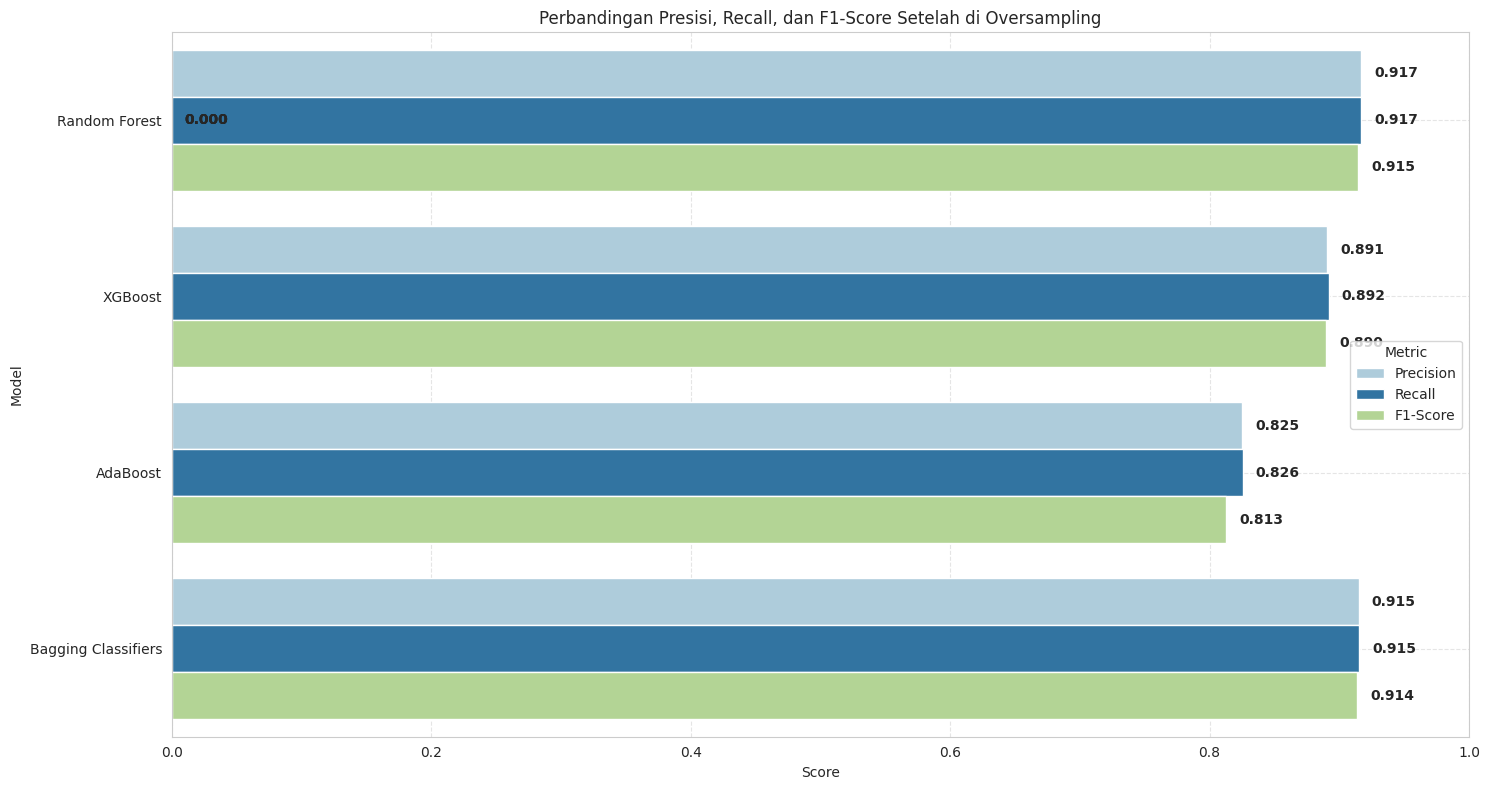

In [ ]:
metrics_list_after_smote = []
for name, pred in models_pred.items():
    precision_after_smote = precision_score(y_test, pred, average='weighted')
    recall_after_smote = recall_score(y_test, pred, average='weighted')
    f1_after_smote = f1_score(y_test, pred, average='weighted')
    metrics_list_after_smote.append({'Model': name.replace(' Model', ''),
                                     'Precision': precision_after_smote,
                                     'Recall': recall_after_smote,
                                     'F1-Score': f1_after_smote})

metrics_df_after_smote = pd.DataFrame(metrics_list_after_smote).melt(id_vars='Model')
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='value', y='Model', hue='variable', data=metrics_df_after_smote, palette='Paired')

for p in ax.patches:
    width = p.get_width()
    height = p.get_y() + p.get_height() / 2
    ax.text(width + 0.01,
            height, f'{width:.3f}',
            ha='left',
            va='center',
            fontsize=10,
            fontweight='bold')

plt.title('Perbandingan Presisi, Recall, dan F1-Score Setelah di Oversampling')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Hyperparameter Tuning Menggunakan Bayesian Optimization

## Random Forest

In [ ]:
# Penerapan Model Random Forest
# rf_search_space adalah Ruang pencarian hyperparameter yang telah didefinisikan.
rf_search_space = {'criterion': ['gini', 'entropy', 'log_loss'],
                   'max_features': ['sqrt', 'log2', 0.8],
                   'n_estimators': [400, 450, 500, 550, 600],
                   'max_depth': [10, 11, 12],
                   'min_samples_split': [3, 4],
                   'min_samples_leaf': [3, 4],
                   'bootstrap': [True, False]}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rf_bayes_search = BayesSearchCV(rf, rf_search_space,
                                cv=cv, scoring='accuracy',
                                n_iter=15, n_jobs=-1,
                                random_state=42, verbose=True)
rf_bayes_search.fit(x_train, y_train)
print('Parameter Terbaik (Random Forest):', rf_bayes_search.best_params_)
print('-'*245)
print('Akurasi Model Terbaik (Random Forest):', rf_bayes_search.best_score_)
print('\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Parameter Terbaik (Random Forest): OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 12), 

## XGBoost

In [ ]:
# Penerapan Model XGBoost
xgb_search_space = {'n_estimators': [450, 500, 550],
                    'learning_rate': [0.082],
                    'max_depth': [4, 5, 6],
                    'subsample': [0.8],
                    'reg_alpha': [0.7, 0.8, 0.9],
                    'reg_lambda': [0.6, 0.7, 0.8],
                    'eval_metric': ['mlogloss']}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
xgb_bayes_search = BayesSearchCV(xgb, xgb_search_space,
                                 cv=cv, scoring='accuracy',
                                 n_iter=20, n_jobs=-1,
                                 random_state=42, verbose=True)
xgb_bayes_search.fit(x_train, y_train)
print('Parameter Terbaik (XGBoost Model):', xgb_bayes_search.best_params_)
print('-'*220)
print('Akurasi Model Terbaik (XGBoost):', xgb_bayes_search.best_score_)
print('\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### XGBoost Model Hyperparameter Tuning:



## AdaBoost

In [ ]:
# Penerapan Model AdaBoost
estimator = DecisionTreeClassifier(random_state=42)
ab = AdaBoostClassifier(estimator, n_estimators=200, random_state=42)
ab_search_space = {'n_estimators': [500, 550, 600],
                   'learning_rate': [0.092],
                   'algorithm': ['SAMME'],
                   'estimator__max_depth': [6, 7, 8, 9],
                   'estimator__min_samples_split': [3, 4, 5],
                   'estimator__min_samples_leaf': [3, 4, 5],
                   'estimator__criterion': ['gini', 'entropy'],
                   'estimator__splitter': ['best', 'random'],
                   'estimator__max_features': ['sqrt', 'log2', 0.8]}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
ab_bayes_search = BayesSearchCV(ab, ab_search_space,
                                cv=cv, scoring='accuracy',
                                n_iter=15, n_jobs=-1,
                                random_state=42, verbose=True)
ab_bayes_search.fit(x_train, y_train)
print('Parameter Terbaik (AdaBoost):', ab_bayes_search.best_params_)
print('-'*325)
print('Akurasi Model Terbaik (AdaBoost):', ab_bayes_search.best_score_)
print('\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Parameter Terbaik (AdaBoost): OrderedDict([('algorithm', 'SAMME'), ('estimator__criterion', 'gini'), ('estimator__m

## Bagging Classifiers

In [ ]:
# Penerapan Bagging Classifier
estimator = DecisionTreeClassifier(random_state=42)
bc = BaggingClassifier(estimator, n_estimators=150, random_state=42)
bc_search_space = {'n_estimators': [400, 450, 500, 550, 600],
                   'bootstrap': [True, False],
                   'bootstrap_features': [True, False],
                   'max_features': [0.8],
                   'max_samples': [0.8],
                   'estimator__max_depth': [11, 12, 13],
                   'estimator__min_samples_split': [3, 4, 5],
                   'estimator__min_samples_leaf': [3, 4, 5],
                   'estimator__criterion': ['gini', 'entropy'],
                   'estimator__splitter': ['best', 'random']}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
bc_bayes_search = BayesSearchCV(bc, bc_search_space,
                                cv=cv, scoring='accuracy',
                                n_iter=15, n_jobs=-1,
                                random_state=42, verbose=True)
bc_bayes_search.fit(x_train, y_train)
print('Parameter Terbaik (Bagging Classifier):', bc_bayes_search.best_params_)
print('-'*345)
print('Akurasi Model Terbaik (Bagging Classifier):', bc_bayes_search.best_score_)
print('\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Parameter Terbaik (Bagging Classifier): OrderedDict([('bootstrap', False), ('bootstrap_features', False), ('estimat

## Analisis dan Interpretasi:

* **Random Forest Model:**
  * Hasil Akurasi Model: > **87%**
  * interpretasi:
    * **Bootstrap** menggunakan **False** artinya dalam proses tidak menggunakan sampling dengan pengembalian, yang dapat membantu mengurangi **overfitting.**
    * **Criterion** menggunakan **entropy** artinya untuk mengukur kualitas pemisahan, yang seringkali lebih sensitif terhadap perbedaan kelas.
    * **Max Depth** menggunakan **12** artinya membatasi kedalaman tree hingga 12 level, mencegah overfitting.
    * **Max Features** menggunakan **80%** sample data artinya fitur pada setiap split, memberikan diveritas dalam pohon.
    * **Min Samples Leaf** menggunakan **3** artinya membutuhkan minimal 3 sample disetiap daun, mencegah overfitting.
    * **Min Samples Split** menggunakan **4** artinya membutuhkan minimal 4 samples untuk membelah node, mencegah overfitting.
    * **N Estimators** menggunakan **450 pohon** artinya menyeimbangkan antara kompleksitas dan performa.
  * kesimpulan: bahwa **Random Forest** dengan konfigurasi ini mencapai skor **>87%** yang cukup baik. walaupun dalam proses awal adalah **77%** kemudian menggunakan **handling class imbalance** mampu **meningkatkan akurasi model** menjadi  **>91%** tetapi **model training** yang didapatkan **100%** artinya model membutuhkan parameter lebih untuk mengurangi efek overfitting dari model. Sehingga pada hasil akhir Akurasi yang dicapai adalah **>87%** atau berhasil menyempurnakan akurasi model sebesar **10% **menjadi lebih baik karena mampu untuk **mencegah overfitting dan meningkatkan kinerja generalisasi model.**

* XGBoost Model:
  * Hasil Akurasi Model: **>91%**
  * Interpretasi:
    * **Eval Metrik** menggunakan **mloglog** artinya menggunakan **multi-class log los** sebagai metrik evaluasi.
    * **Learning Rate** menggunakan **0.082** artinya tingkat pembelajaran yang relatif tinggi, memungkinkan model untuk belajar lebih cepat.
    * **Max Depth** menggunakan **6** artinya membatasi kedalaman pohon hingga 6 level, mencegah **overfitting.**
    * **N Estimators** menggunakan **550 tree** artinya menyeimbangkan antara kompleksitas dan performa.
    * **Reg Alpha** menggunakan **0.7** artinya **regularisasi L1** dengan koefisien 0.7 membantu mencegah **overfitting.**
    * **Reg Lambda** menggunakan **0.6** artinya **Regularisasi L2** dengan keofisien 0.6, membantu mencegah **overfitting.**
    * **Subsample** menggunakan **80%** artinya menggunakan 80% sample pada setiap iterasi, memberikan diversitas dalam pohon.
  * Kesimpulan: bahwa model XGBoost dengan konfigurasi ini mencapai akurasi >91, yang merupakan yang tetinggi diantara model yang diuji. pengaturan hyperparameter membantu model belajar dengan cepat, mencegah overfitting dan meningkatkan kemampuan generalisasi model. walaupun pada proses awal >71% dan meningkatkan akurasi model dengan handling class imbalance dengan capaian akurasi >89% atau naik sebesar 17%. Hal ini tentu bisa ditingkatkan lagi dengan hyperparameter tuning untuk meningkatkan model performa dengan menghasilkan peningkatan akurasi >91% atau naik menjadi 19% dari sebelumnya.

* AdaBoost Model:
  * Hasil Akurasi Model: **>89%.**
  * Interpretasi:
    * **Algoritma** menggunakan **SAMME (Stagewise Additive Modeling using a Multi-class Exponential loss function).**
    * **Estimator_Criterion** menggunakan **gini** artinya untuk mengukur kualitas pemisahan.
    * **Estimator_Max Depth** menggunakan **9** artinya membatasi kedalaman pohon hingga 9 level mencegah **overfitting.**
    * **Estimator_Max Features** menggunakan **80% fitur** pada setiap split, memberikan diversirtas dalam tree.
    * **Estimator_Min Samples Leaf** menggunakan **4** artinya membutuhkan minimal 4 sample disetiap daun, mencegah **overfitting.**
    * **Estimator_Min Samples Split** menggunakan **4** artinya membutuhkan minimal 4 sample untuk membelah node, mencegah **overfitting.**
    * **Estimator_Splitter** mengguanakn **best** artinya menggunakan pemisahan terbaik.
    * **Learning Rate** menggunakan **0.092** artinya tingkat pembelajaran yang relatig tinggi, memungkinkan model untuk belajar lebih cepat.
    * **N Estimators** menggunakan **600** artinya menggunakan 600 tree, dalam menyeimbangkan antara kompleksitas dan performa.
  * Kesimpulan: **Model AdaBoost** dengan konfigurasi ini mencapai akurasi **>89%**, yang cukup baik. pengaturan hyperparameter membantu model belajar dengan cepat dan mencegah **overfitting.** Awalnya model ini memiliki perfoma evaluasi model yang sangat buruk yang hanya memiliki **akurasi sebesar 63%** yang kemudian dilakukan teknik handling class imbalance yang mampu meningkatkan performa dan akurasi model yang signifikan menjadi **83%** dan dilakukan hyperparameter tuning dengan mengkombinasikan dengan model **Decision Tree sebagai base estimator** yang mempu memberikan performa dan akurasi model naik menjadi **>89%** atau **naik sebesar 26%** dari akurasi model sebelumnya.

* Bagging Classifier Model:
  * Hasil Akurasi Model: **>87**
  * Interpretation:
    * **Bootstrap** menggunakan **False** artinya tidak menggunakan sampling dengan pengembalian, yang dapat membantu mengurangi **overfitting.**
    * **Bootstrap Features** menggunakan **False** artinya tidak menggunakan sampling fitur dengan pengembalian, yang dapat membantu mengurangi **overfitting.**
    * **Estimator_Criterion** menggunakan **gini** artinya menggunakan indeks gini untuk mengukur kualitas pemisahan.
    * **Estimator_Max Depth** menggunakan **13** artinya membatasi kdelaman tree hingga 13 level, mencegah **overfitting.**
    * **Estimator_Min Samples Leaf** menggunakan **5** artinya menggunakan minimal 5 sample di setiap daun, mencegah **overfitting.**
    * Estimator_Splitter menggunakan best artinya menggunakan pemisahan terbaik.
    * **Max Features** menggunakan **80%** fitur pada setiap split, memberikan diversitas dalam tree.
    * **Max Samples** menggunakan **80% sample data** pada setiap iterasi, memberikan dibersitas dalam tree.
    * **N Estimators** menggunakan **600 tree** untuk menyeimbangkan antara kompleksitas dan performa.
  * Kesimpulan: **Model Bagging Classifier** dengan konfigurasi ini mencapai akurasi **>87%** yang cukup baik. pengaturan hyperparameter membantu model belajar dengan baik dan mencegah **overfitting** yang awalnya sama dengan model **Random Forest** yang sama-sama memiliki akurasi dan performa model terbaik dari semua model yang dipakai. untuk proses awal **akurasi mencapai 78%** dan mengalami kenaikan signifikan setelah handling class imbalance yang mencapai **akurasi sebesar >92%** atau peningkatan **naik sebesar 14%** dari sebelumnya. Namun, model ini saat dilihat model training yang sangat baik tapi kurangnya bahwa model tidak hanya belajar dengan **pola historis** tapi dengan **outlier** yang mengakibatkan **overfitting**, atau sama dengan **random forest**. maka model ini, harus dipasang parameter yang tepat untuk menyempurnakan model prediksi dengan **hyperparameter tuning** yang mencapai skor prediksi **>87%** atau naik **9%** dari proses awal atau turun **5%** dari proses setelah di handling imbalance. walaupun mengalami penurunan, model bagging classifier telah menunjukkan model prediksi terbaik dengan **>87%** mengurangi **overfitting** dan meningkatkan generalisasi kinerja model.

# Perbandingan Model Training dan Testing Sesudah Dilakukan Hyperparameter Tuning dengan BayesSearchCV

In [ ]:
## Penerapan Model Random Forest
# Prediksi pada data pelatihan dan data uji
rf_bayes_search_y_train_pred = rf_bayes_search.predict(x_train)
rf_bayes_search_y_test_pred = rf_bayes_search.predict(x_test)
# Menghitung akurasi
rf_bayes_search_train_accuracy = accuracy_score(y_train, rf_bayes_search_y_train_pred)
rf_bayes_search_test_accuracy = accuracy_score(y_test, rf_bayes_search_y_test_pred)
print(f"Akurasi pada data pelatihan (Random Forest): {rf_bayes_search_train_accuracy:.3f}")
print(f"Akurasi pada data uji (Random Forest): {rf_bayes_search_test_accuracy:.3f}")
print('-'*150)
print('\n')

## Penerapan Model XGBoost
# Prediksi pada data pelatihan dan data uji
xgb_bayes_search_y_train_pred = xgb_bayes_search.predict(x_train)
xgb_bayes_search_y_test_pred = xgb_bayes_search.predict(x_test)
# Menghitung akurasi
xgb_bayes_search_train_accuracy = accuracy_score(y_train, xgb_bayes_search_y_train_pred)
xgb_bayes_search_test_accuracy = accuracy_score(y_test, xgb_bayes_search_y_test_pred)
print(f"Akurasi pada data pelatihan (XGBoost): {xgb_bayes_search_train_accuracy:.3f}")
print(f"Akurasi pada data uji (XGBoost): {xgb_bayes_search_test_accuracy:.3f}")
print('-'*150)
print('\n')


# Penerapan Model AdaBoost
# Prediksi pada data pelatihan dan data uji
ab_bayes_search_y_train_pred = ab_bayes_search.predict(x_train)
ab_bayes_search_y_test_pred = ab_bayes_search.predict(x_test)
# Menghitung akurasi
ab_bayes_search_train_accuracy = accuracy_score(y_train, ab_bayes_search_y_train_pred)
ab_bayes_search_test_accuracy = accuracy_score(y_test, ab_bayes_search_y_test_pred)
print(f"Akurasi pada data pelatihan (AdaBoost): {ab_bayes_search_train_accuracy:.3f}")
print(f"Akurasi pada data uji (AdaBoost): {ab_bayes_search_test_accuracy:.3f}")
print('-'*150)
print('\n')

## Penerapan Model Bagging Classifier
# Prediksi pada data pelatihan dan data uji
bc_bayes_search_y_train_pred = bc_bayes_search.predict(x_train)
bc_bayes_search_y_test_pred = bc_bayes_search.predict(x_test)
# Menghitung akurasi
bc_bayes_search_train_accuracy = accuracy_score(y_train, bc_bayes_search_y_train_pred)
bc_bayes_search_test_accuracy = accuracy_score(y_test, bc_bayes_search_y_test_pred)
print(f"Akurasi pada data pelatihan (Bagging Classifier): {bc_bayes_search_train_accuracy:.3f}")
print(f"Akurasi pada data uji (Bagging Classifier): {bc_bayes_search_test_accuracy:.3f}")
print('-'*150)
print('\n')

Akurasi pada data pelatihan (Random Forest): 0.900
Akurasi pada data uji (Random Forest): 0.875
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (XGBoost): 0.971
Akurasi pada data uji (XGBoost): 0.918
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (AdaBoost): 0.941
Akurasi pada data uji (AdaBoost): 0.892
------------------------------------------------------------------------------------------------------------------------------------------------------


Akurasi pada data pelatihan (Bagging Classifier): 0.904
Akurasi pada data uji (Bagging Classifier): 0.877
------------------------------------------------------------------------------------------------------------------------------------------------------




# Klasifikasi Report Sesudah Dilakukan Hyperparameter Tuning Menggunakan Bayesian Optimization

In [ ]:
# Function to evaluate models by printing classification report and ROC-AUC score
def evaluate_tuned_model(y_test, predictions, probabilities, model_name):
  # Normalize probabilities for each class
  unique_classes = np.unique(y_test)

  # Generate classification report
  report = classification_report(y_test, predictions)
  probabilities_filtered = probabilities[:, unique_classes]
  probabilities_normalized = probabilities_filtered/probabilities_filtered.sum(axis=1, keepdims=True)
  roc_auc = roc_auc_score(y_test, probabilities_normalized, multi_class='ovr')

  # Print model evaluation results
  print(f'Model: {model_name} (Bayesian Optimization Tuning)')
  print(report)
  print('-' * 60)
  print(f'ROC_AUC Score: {roc_auc:.4f}')
  print('-' * 60)

# Random Forest
best_params_rf_predictions = rf_bayes_search.predict(x_test)
best_params_rf_probabilities = rf_bayes_search.predict_proba(x_test)

# XGBoost
best_params_xgb_predictions = xgb_bayes_search.predict(x_test)
best_params_xgb_probabilities = xgb_bayes_search.predict_proba(x_test)

# AdaBoost
best_params_ab_predictions = ab_bayes_search.predict(x_test)
best_params_ab_probabilities = ab_bayes_search.predict_proba(x_test)

# Bagging Classifier
best_params_bc_predictions = bc_bayes_search.predict(x_test)
best_params_bc_probabilities = bc_bayes_search.predict_proba(x_test)

# Evaluate various models by calling the evaluate_model function with their predictions and probabilities
evaluate_tuned_model(y_test, best_params_rf_predictions, best_params_rf_probabilities, 'Model Random Forest')
print('Best Hyperparameter Tuning with Bayesian Optimization:')
print(rf_bayes_search.best_params_)
print('-' * 180)
print('\n')
evaluate_tuned_model(y_test, best_params_xgb_predictions, best_params_xgb_probabilities, 'Model XGBoost')
print('Best Hyperparameter Tuning with Bayesian Optimization:')
print(xgb_bayes_search.best_params_)
print('-' * 180)
print('\n')
evaluate_tuned_model(y_test, best_params_ab_predictions, best_params_ab_probabilities, 'Model AdaBoost')
print('Best Hyperparameter Tuning with Bayesian Optimization:')
print(ab_bayes_search.best_params_)
print('-' * 290)
print('\n')
evaluate_tuned_model(y_test, best_params_bc_predictions, best_params_bc_probabilities, 'Model Bagging Classifiers')
print('Best Hyperparameter Tuning with Bayesian Optimization:')
print(bc_bayes_search.best_params_)
print('-' * 305)
print('\n')

Model: Model Random Forest (Bayesian Optimization Tuning)
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     10015
           1       0.92      0.89      0.91      8517
           2       0.84      0.64      0.72      3852

    accuracy                           0.87     22384
   macro avg       0.87      0.83      0.84     22384
weighted avg       0.87      0.87      0.87     22384

------------------------------------------------------------
ROC_AUC Score: 0.9580
------------------------------------------------------------
Best Hyperparameter Tuning with Bayesian Optimization:
OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 12), ('max_features', 0.8), ('min_samples_leaf', 3), ('min_samples_split', 4), ('n_estimators', 450)])
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


M

# Confusion Matrix Sesudah Dilakukan Hyperparameter Tuning Menggunakan Bayesian Optimization

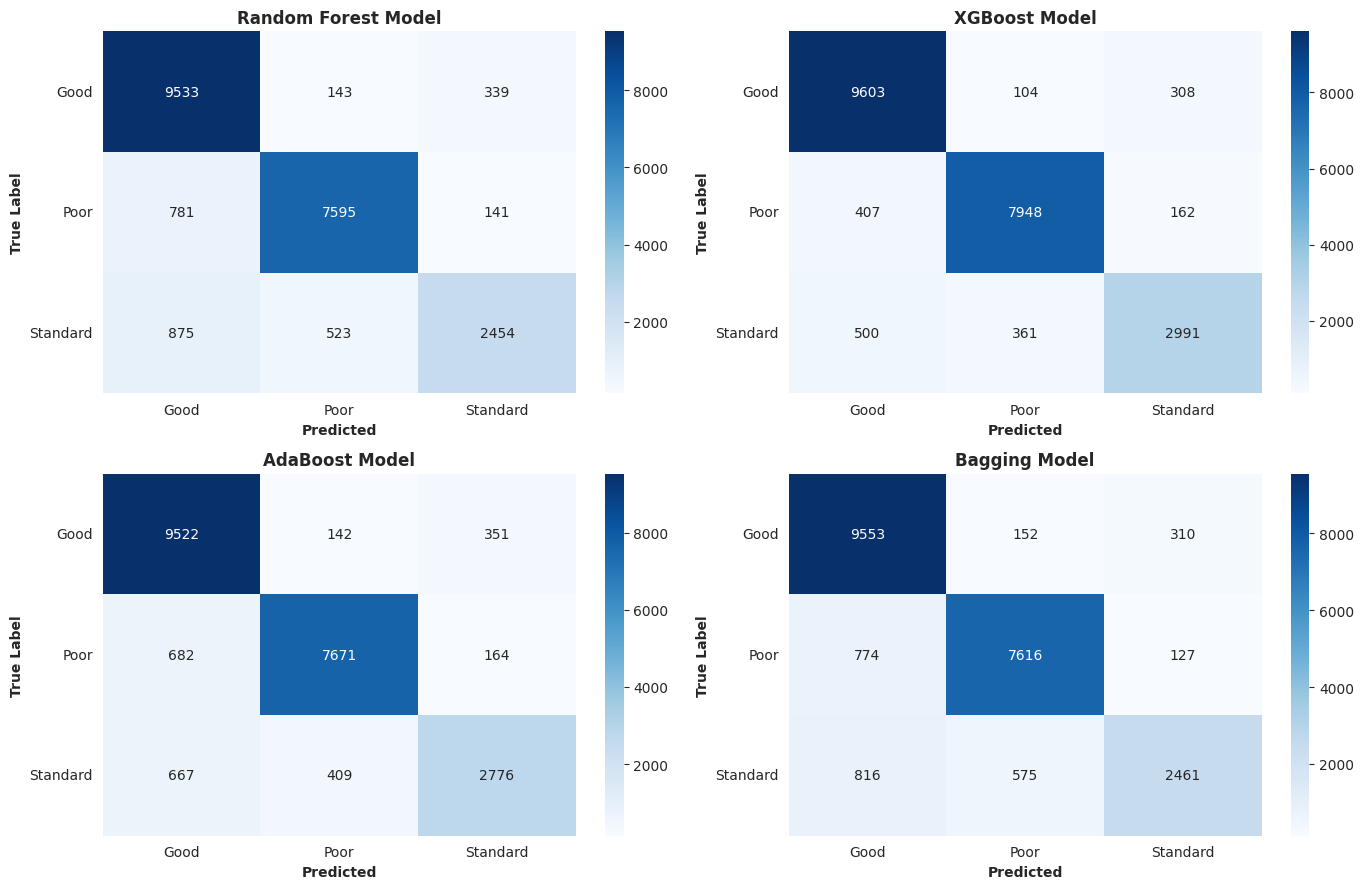

In [ ]:
# Create a dictionary with the model names as keys and the corresponding predictions as values
models_pred_tuned = {'Random Forest Model': best_params_rf_predictions,
                     'XGBoost Model': best_params_xgb_predictions,
                     'AdaBoost Model':best_params_ab_predictions,
                     'Bagging Model': best_params_bc_predictions}

# Create subplots to display all confusion matrices in one frame
fig, axes = plt.subplots(2,2, figsize=(14,9))
axes = axes.flatten()

# Iterate over each model and its predictions to plot confusion matrices
for ax, (model_name_tuned, predictions) in zip(axes, models_pred_tuned.items()):
  cm = confusion_matrix(y_test, predictions)

  # Plot the confusion matrix using Seaborn's heatmap
  sns.heatmap(cm,
              annot=True,
              fmt='d',
              cmap='Blues',
              xticklabels=target_labels,
              yticklabels=target_labels,
              ax=ax)

  # Set the title, x-label, and y-label for each plot
  ax.set_title(f'{model_name_tuned}', fontsize=12, fontweight='bold')
  ax.set_ylabel('True Label', fontsize=10, fontweight='bold')
  ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')

  # Rotate tick labels for better readability
  ax.tick_params(axis='x', labelrotation=0)
  ax.tick_params(axis='y', labelrotation=0)

plt.tight_layout()
plt.show()

### Analisis dan Interpretasi.

* **Random Forest Model:**
  * **Good:**
    * Terlihat bahwa **True Positif (TP)** adalah **9533** artinya model dengan sangat baik mengidentifikasi **class good**
    * **False Negatif (FN)** adalah **143 + 339 = 482** artinya ada sedikit kesalahan dalam memprediksi **class good** sebagai **class poor** atau **class standard**.
  * **Poor:**
    * **True Positif (TP)** adalah **7595** artinya performa cukup baik dalam mengidentifikasi **poor.**
    * **False Negatif (FN)** adalah **781 + 141 = 922** artinya beberapa **poor** diprediksi salah menjadi **good **atau **standard**.
  * **Standard:**
    * **True Positif (TP)** adalah **2454** artinya performa baik dalam mengidentifikasi **standard**.
    * **False Negatif (FN)** adalah **875 + 523 = 1398** artinya ada beberapa kesalahan dalam memprediksi **standard**  sebagai **good** atau **poor.**
  * **Interpretasi:**
    * kinerja terbaik pada **Good**: **model Random Forest** sangat efektif dalam mengidentifikasi kelas **good**, dengan **TP** sebesar **9533.**
    * kurangnya konsistensi pada **standard**, meskipun performa pada **poor** cukup baik, model masih memiliki kesulitan dalam identifikasi kelas **standard** secara akurat.

* **XGBoost Model:**
  * **Good:**
    * **True Positif (TP)** adalah **9603** artinya model sangat baik dalam identifikasi sample **good**
    * **False Negatif (FN)** adalah **104 + 308 = 412** artinya ada sedikit kesalahan dalam memprediksi **good** sebagai **poor** atau **standard**
  * **Poor:**
    * **True Positif (TP)** adalah **7948** artinya performa sangat baik dalam mengidentifikasi **poor.**
    * **False Negatif (FN)** adalah **407 + 162 = 569** artinya beberapa **poor** diprediksi salah menjadi **good** atau **standard.**
  * **Standard:**
    * **True Positif (TP)** adalah **2991** artinya performa baik dalam mengidentifikasi **standard**.
    * **False Negatif (FN)** adalah **500 + 361 = 861** artinya ada beberapa kesalahan dalam memprediksi **standard** sebagai **good** atau **poor.**
  * **Interpretasi:**
    * performa terbaik disemua kelas: **XGBoost** menunjukkan performa yang sangat baik dalam mengidentifikasi semua kelas, dengan **TP** tinggi untuk **good = 9603** dan **poor = 7948.**
    * konsistensi tinggi memberikan model ini menunjukkan konsistensi yang baik dalam menghindari **False Negatif**, terutama untuk kelas **good** dan **poor.**

* **AdaBoost Model:**
  * **Good**:
    * **True Positif (TP)** adalah **9522** artinya model sangat baik dalam mengidentifikasi sample **good.**
    * **False Negatif (FN)** adalah **142 + 351 = 493** artinya ada sedikit kesalahan dalam memprediksi **good** sebagai **poor** atau **standard.**
  * **Poor:**
    * **True Positif (TP)** adalah **7671** artinya performa sangat baik dalam mengidentifikasi **poor.**
    * **False Negatif (FN)** adalah **682 + 164 = 846** artinya beberapa poor diprediksi salah menjadi **poor** atau **standard.**
  * **Standard:**
    * **True Positif (TP)** adalah **2776** artinya performa baik dalam mengidentifikasi **standard.**
    * **False Negatif (FN)** adalah **667 + 409 = 1076** artinya ada beberapa kesalahan dalam memprediksi standard sebagai **good** atau **poor.**
  * **Interpretasi:**
    * efektivitas pada **Good** dan **Poor**: **AdaBoost model** cukup efektif dalam mengidentifikasi kelas **Good TP = 9522** dan **Poor TP = 7671**.
    * masalah pada **standard** memberikan model masih memiliki kesulitan dalam mengidentifikasi **kelas standard** secara akurat.

* **Bagging Classifier Model:**
  * **Good:**
    * **True Positif (TP)** adalah **9553** artinya model sangat baik dalam mengidentifikasi sample **good.**
    * **False Negatif (FN)** adalah **152 + 310 = 462** artinya ada sedikit kesalahan dalam memprediksi good sebagai **poor** atau **standard.**
  * **Poor:**
    * **True Positif (TP)** adalah **7616** artinya performa model sangat baik dalam mengidentifikasi **poor.**
    * **False Negatif (FN)** adalah **774 + 127 = 901** artinya ada beberapa **poor** diprediksi salah menjadi **good** atau **standard.**
  * **Standard:**
    * **True Positif (TP)** adalah **2461** artinya model baik dalam mengidentifikasi **standard.**
    * **False Negatif (FN)** adalah **816 + 575 = 1391** artinya ada beberapa kesalahan dalam memprediksi standard sebagai **good** atau **poor.**
  * Interpretasi:
    * kinerja terbaik pada **good** artinya **model Bagging Classifier** sangat efektif dalam mengidentifikasi **kelas good dengan TP = 9553**.
    * kurangnya konsistensi pada **standard** meskipun performa pada **poor** cukup baik, tapi model masih memiliki kesulitan untuk mengidentifikasi kelas **standard** secara akurat.


* **Kesimpulan yang dapat diisi adalah:**
  * untuk pemilihan model terbaik dari hasil proses dan kinerja model **XGBoost** memiliki trend selalu naik dan menjadikan model dengan akurasi model terbaik yaitu **>91%** dang performa model **TP** untuk **kelas good = 9603; kelas poor = 7948; dan kelas standard = 2991.**
  * Efektivitas pada **good** semua model menunjukkan performa yang sangat baik dalam mengidentifikasi kelas **good**, dengan **TP yang tinggi (semua lebih dari 9500).**
  * mengalami kesulitan saat identifikasi kelas **standard** yang mana semua model masih kesulitan secara akurat. meskipun ada perbedaan kecil dalam jumlah **TP.**
  * **rekomendasi** adalah jika prioritas utama adalah mengidentifikasi untuk semua kelas dengan akurasi dan performa yang tinggi, **model XGBoost** adalah **pilihan terbaik.** sedangkan untuk kelas **good**, model **Random Forest**, **Model AdaBoost**, dan **Model Bagging Classifier** bisa menjadi pilihan terbaik juga.

# Feature Importence

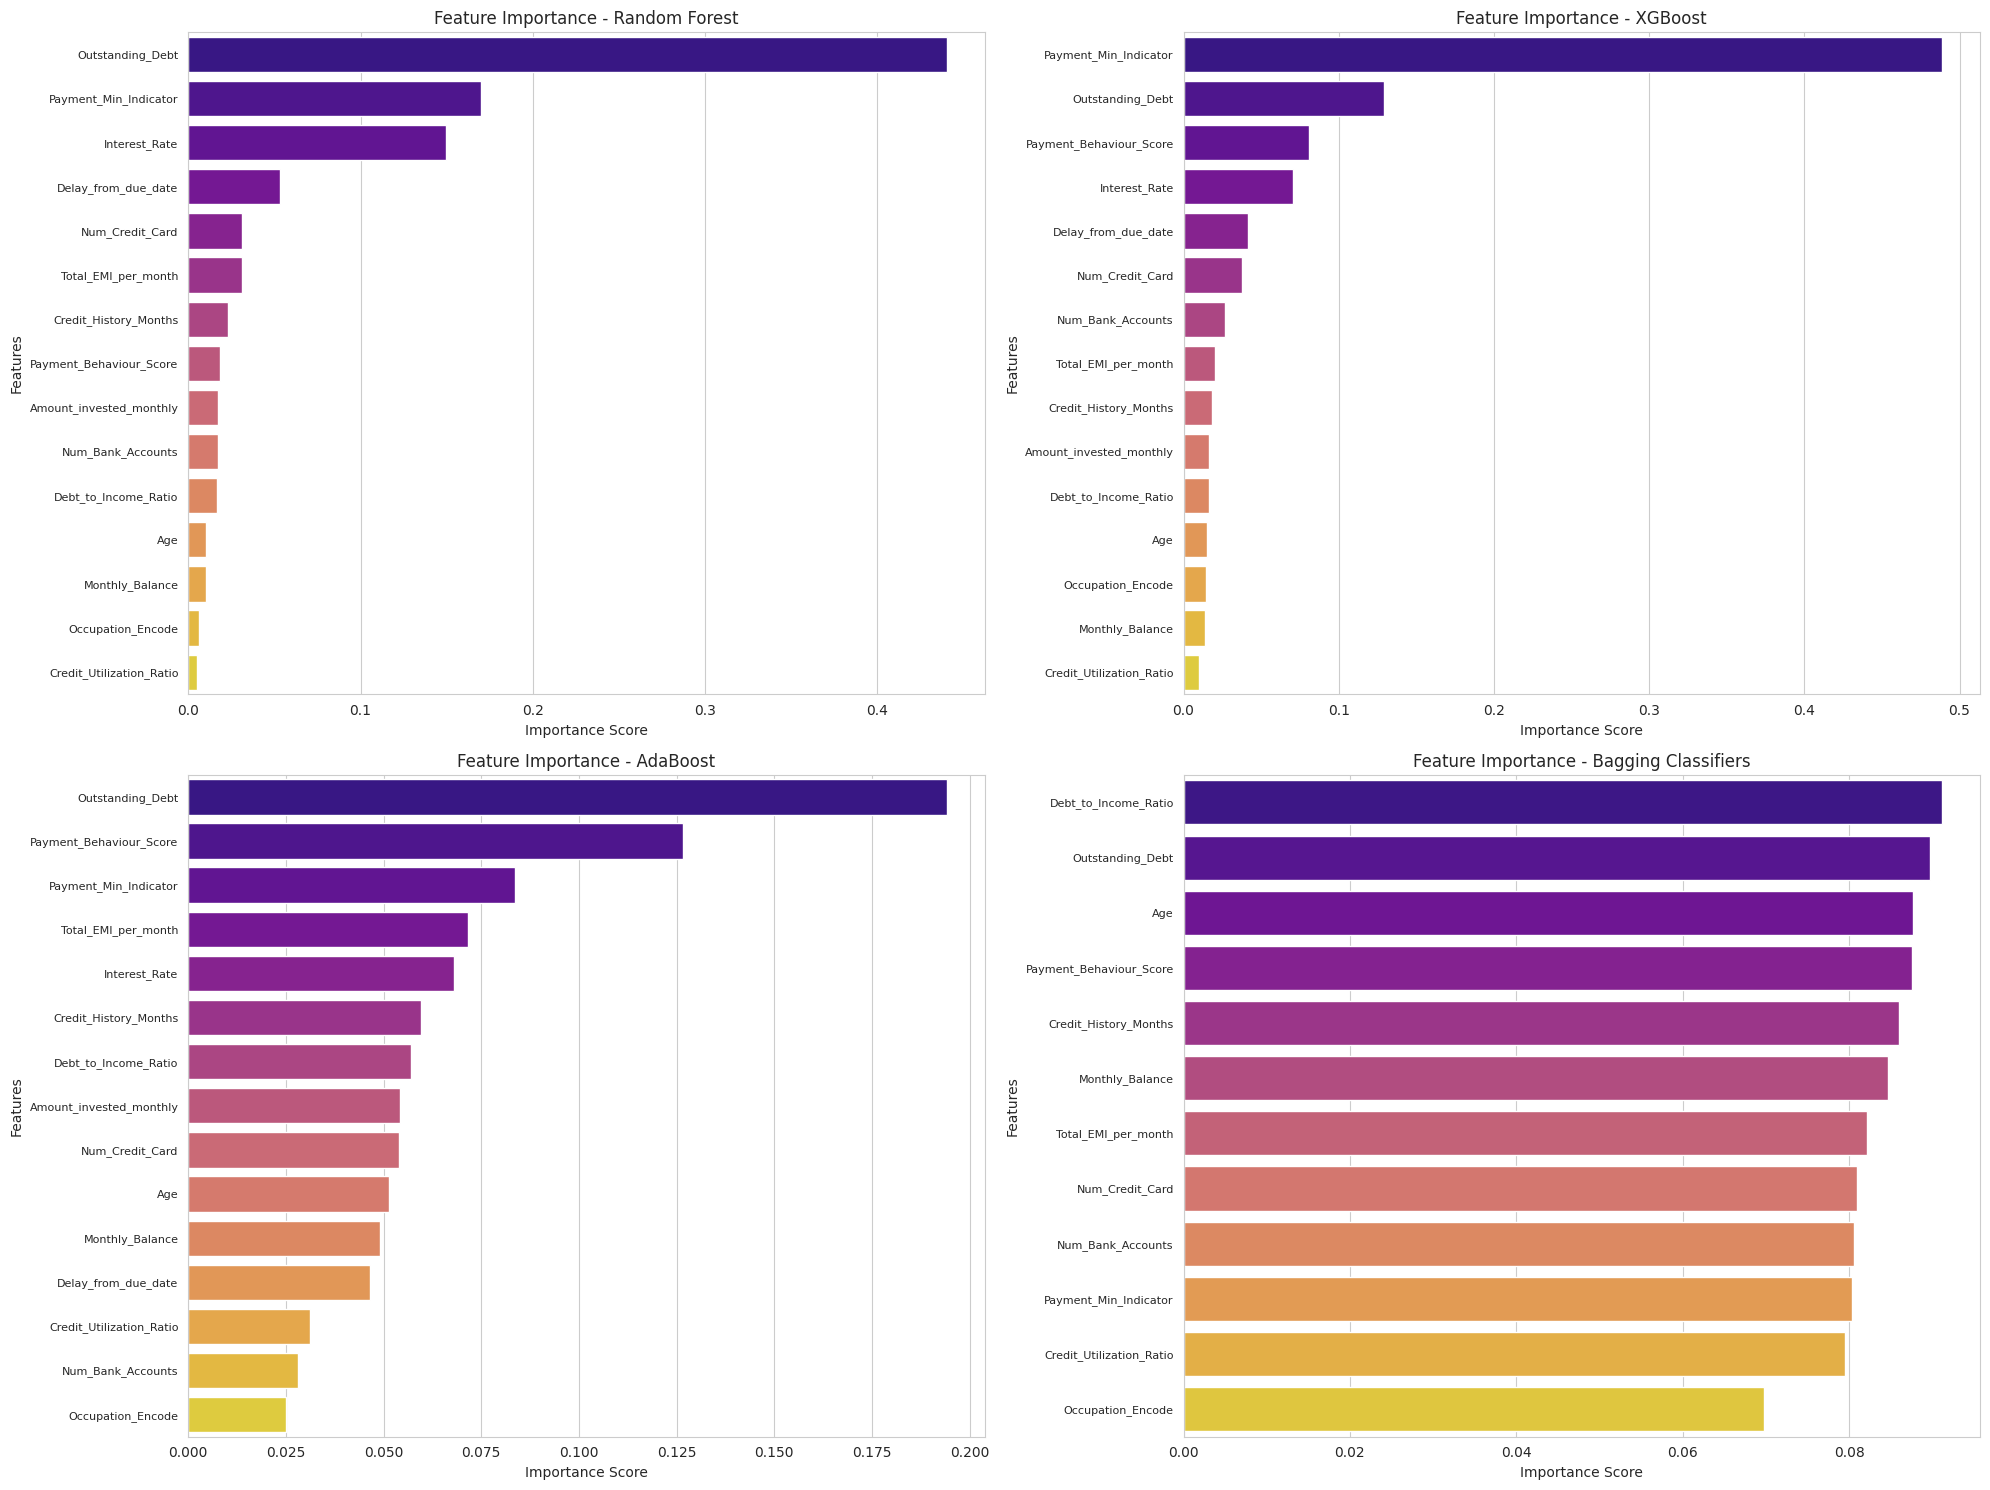

In [ ]:
# analisis Feature Impoertance berdasarkan hasil Model Prediction
list_name = x_train.columns.tolist()

# mendapatkan model terbaik dan feature importance
# Hasil Model Random Forest
rf_model = rf_bayes_search.best_estimator_
rf_imp = rf_model.feature_importances_

# Hasil Model XGBoost
xgb_model = xgb_bayes_search.best_estimator_
xgb_imp = xgb_model.feature_importances_

# Hasil Model AdaBoost
ab_model = ab_bayes_search.best_estimator_
ab_imp = ab_model.feature_importances_

# Hasil Model Bagging Classifier
bc_model = bc_bayes_search.best_estimator_
bc_imp = np.mean([tree.feature_importances_ for tree in bc_model.estimators_], axis=0)

# membuat visualisasi plot 2X2 untuk Plot Feature Importance.
fig, axes = plt.subplots(2,2, figsize=(20,15))
models = [('Random Forest', rf_imp),
          ('XGBoost', xgb_imp),
          ('AdaBoost', ab_imp),
          ('Bagging Classifiers', bc_imp)]
for ax, (name, importance) in zip(axes.flatten(), models):
  sorted_idx = np.argsort(importance)[::-1]
  sorted_importance = importance[sorted_idx]
  sorted_features = [list_name[i] for i in sorted_idx]
  sns.barplot(x=sorted_importance,
              y=sorted_features, ax=ax,
              palette='plasma')
  ax.set_title(f'Feature Importance - {name}', fontsize=12)
  ax.set_xlabel('Importance Score', fontsize=10)
  ax.set_ylabel('Features', fontsize=10)
  ax.tick_params(axis='y', labelsize=8)
plt.tight_layout()
plt.show()

## Analisis dan Interpretasi:


* **Random Forest Model:**
  * **Outsanding_Debt** adalah fitur yang paling dominan diprediksi, dengan skor importansi tertinggi sekitar **0.49** menunjukkan bahwa jumlah utang yang belum lunas sangat berpengaruh dalam **memprediksi kelas target.**
  * **Payment_Min_Indicator** dan **Interest_Rate** juga memiliki peran penting meskipun lebih rendah dibandingkan **Outstanding_Debt.**
  * Sisanya memiliki kontribusi **minimal,** dengan beberapa **fitur seperti Age, Monthly_Balance, dan Credit_Utilization_Ratio** hampir tidak berpengaruh.

* **XGBoost Model:**
  * **Payment_Min_Indicator** adalah fitur dominan, dengan skor importansi tertinggi sekitar **0.50**. Ini menunjukkan bahwa **indikator pembayaran minimum** sangat berpengaruh dalam **memprediksi kelas target**.
  * **Outstanding_Debt** dan **Payment_Behaviour_Score** juga memiliki peran penting, meskipun lebih rendah dibandingkan **Payment_Min_Indicator.**
  * Sisanya memiliki kontribusi minimal, dengan beberapa fitur seperti **Age, Monthly_Balance,** dan **Credit_Utilization_Ratio** hampir tidak berpengaruh.

* **AdaBoost Model:**
  * **Outstanding_Debt** adalah fitur dominan, dengan skor importansi tertinggi adalah sekitar **0.49.** Ini menunjukkan bahwa jumlah utang yang belum lunas sangat berpengaruh dalam **memprediksi kelas target.**
  * **Payment_Behaviour_Score** dan **Payment_Min_Indicator** juga memiliki peran penting, meskipun lebih rendah dibandingkan **Outstanding_Debt.**
  * Beberapa fitur lain seperti **Total_EMI_per_month, Interest_Rate, Credit_History_Months,** dan **Debt_to_Income_Ratio** memiliki kontribusi signifikan, tetapi lebih rendah dibandingkan fitur utama.
  * Sisanya memiliki kontribusi moderat, dengan beberapa fitur seperti **Occupation_Encode** memiliki kontribusi minimal.

* **Bagging Classifier Model:**
  * Debt_to_Income_Ratio, Outstanding_Debt, **teks tebal** dan **Age** memiliki skor importansi tertinggi adalah sekitar **0.09**, menunjukkan bahwa rasio utang terhadap pendapatan, jumlah utang yang belum lunas, dan usia sangat berpengaruh dalam **memprediksi kelas target.**
  * **Payment_Behaviour_Score, Credit_History_Months, Monthly_Balance, Total_EMI_per_month, Num_Credit_Card, Num_Bank_Accounts, Payment_Min_Indicator, Credit_Utilization_Ratio,** dan **Occupation_Encode** juga memiliki kontribusi signifikan, meskipun lebih rendah dibandingkan fitur utama.
  * Keseluruhan distribusi menunjukkan bahwa banyak fitur memiliki kontribusi yang cukup merata, dengan sedikit perbedaan dalam skor importansi.

* **Kesimpulan Utama:**
  * **Fitur Utama:**
    * **Outstanding_Debt** dan **Payment_Min_Indicator** muncul sebagai fitur penting di semua model, menunjukkan pentingnya jumlah utang dan perilaku pembayaran minimum.
    * **Debt_to_Income_Ratio** dan **Age** juga memiliki peran penting dalam beberapa model.
  * **Fitur Pendukung:**
    * **Num_Credit_Card, Num_Bank_Accounts, Monthly_Balance, Occupation_Encode,** dan **Credit_Utilization_Ratio** memiliki kontribusi minimal atau rendah.

* **Rekomendasi:**
  * Fokus pada **Fitur Utama** : Prioritaskan **Outstanding_Debt, Payment_Min_Indicator, Debt_to_Income_Ratio, dan Age** dalam analisis lebih lanjut.
  * **Penghapusan Fitur Kurang Penting**: Pertimbangkan menghapus atau mengganti fitur seperti **Num_Credit_Card, Num_Bank_Accounts,** dan **Occupation_Encode** jika mereka tidak memberikan nilai tambah signifikan.
  * **Domain Knowledge:** Gunakan pengetahuan domain untuk memvalidasi hasil **feature importance** dan memahami relevansi fitur-fitur tersebut.